In [78]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}" ) 

Python 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Pandas 1.4.4
NumPy 1.22.4


### เตรียมข้อมูล เอาไฟล์ raw_titles.csv เข้า

In [79]:
df_titles = pd.read_csv('raw_titles.csv')  
df_titles
#รายละเอียดหนัง

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [80]:
#cleandata
df_titles.isna().sum()

index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [81]:
#drop NaN ในคอลัมน์ imdb_score, imdb_id และ imdb_votes
df_titles=df_titles.dropna(subset=['imdb_score','imdb_id','imdb_votes'])
df_titles.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0


In [82]:
df_titles.isna().sum()

index                      0
id                         0
title                      0
type                       0
release_year               0
age_certification       2278
runtime                    0
genres                     0
production_countries       0
seasons                 3391
imdb_id                    0
imdb_score                 0
imdb_votes                 0
dtype: int64

In [83]:
df_titles.loc[df_titles['imdb_score'].isna()]

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


## df_show

In [171]:
#ความนิยมของซีรีส์
#แบ่งข้อมูลออกมาเฉพาะที่เป็นซีรีส์
df_show = df_titles[df_titles['type']=='SHOW']
df_show.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0
29,29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2144.0
47,47,ts20681,Seinfeld,SHOW,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,302700.0
55,55,ts22082,Knight Rider,SHOW,1982,TV-PG,51,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,33760.0
57,57,ts21715,Thomas & Friends,SHOW,1984,TV-Y,10,"['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,tt0086815,6.5,4948.0


In [85]:
df_show.isna().sum()

index                     0
id                        0
title                     0
type                      0
release_year              0
age_certification       206
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                   0
imdb_score                0
imdb_votes                0
dtype: int64

In [86]:
#เลือกข้อมูลมาแค่แถว ที่ imdb_score มากกว่าเท่ากับ 8
df_show_8=df_show[df_show['imdb_score']>=8]
df_show_8.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0
29,29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2144.0
47,47,ts20681,Seinfeld,SHOW,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,302700.0
106,106,ts22176,Stargate SG-1,SHOW,1997,TV-PG,44,"['scifi', 'drama', 'action']","['US', 'CA']",10.0,tt0118480,8.4,90196.0
110,110,ts20339,One Piece,SHOW,1999,TV-14,23,"['action', 'comedy', 'animation', 'drama', 'fa...",['JP'],21.0,tt0388629,8.8,112586.0


In [87]:
df_show_8=df_show_8.sort_values(by='imdb_votes',ascending=True)
df_show_8

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5680,5680,ts288861,Let's Eat,SHOW,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0
2181,2181,ts82268,GHOUL,SHOW,2018,TV-MA,46,"['scifi', 'drama', 'fantasy', 'horror']",['IN'],2.0,tt5909930,8.0,6.0
2927,2927,ts265844,#ABtalks,SHOW,2018,TV-PG,68,[],[],1.0,tt12635254,9.6,7.0
4913,4913,ts94677,Worst Roommate Ever,SHOW,2022,TV-MA,47,"['crime', 'documentation', 'drama', 'thriller']",['US'],1.0,tt8323702,8.1,8.0
1488,1488,ts144323,Unnatural Selection,SHOW,2015,TV-MA,35,"['reality', 'documentation', 'comedy']",['US'],1.0,tt11063952,8.1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,940,ts6,House of Cards,SHOW,2013,TV-MA,52,['drama'],['US'],6.0,tt1856010,8.7,494092.0
704,704,ts278,Black Mirror,SHOW,2011,TV-MA,59,"['scifi', 'thriller', 'drama', 'european']",['GB'],5.0,tt2085059,8.8,515577.0
244,244,ts9,The Walking Dead,SHOW,2010,TV-MA,46,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.0,tt1520211,8.2,945125.0
1219,1219,ts38796,Stranger Things,SHOW,2016,TV-14,52,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['US'],5.0,tt4575572,8.7,989090.0


In [88]:
mean_vote_8 = df_show_8['imdb_votes'].mean()
mean_vote_8

57670.102857142854

In [89]:
df_votes_8_lessmean=df_show_8[df_show_8['imdb_votes']<mean_vote_8]
df_votes_8_lessmean.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5680,5680,ts288861,Let's Eat,SHOW,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0
2181,2181,ts82268,GHOUL,SHOW,2018,TV-MA,46,"['scifi', 'drama', 'fantasy', 'horror']",['IN'],2.0,tt5909930,8.0,6.0
2927,2927,ts265844,#ABtalks,SHOW,2018,TV-PG,68,[],[],1.0,tt12635254,9.6,7.0
4913,4913,ts94677,Worst Roommate Ever,SHOW,2022,TV-MA,47,"['crime', 'documentation', 'drama', 'thriller']",['US'],1.0,tt8323702,8.1,8.0
1488,1488,ts144323,Unnatural Selection,SHOW,2015,TV-MA,35,"['reality', 'documentation', 'comedy']",['US'],1.0,tt11063952,8.1,12.0


In [90]:
df_votes_8_lessmean.sort_values(by='imdb_score',ascending=False)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
2927,2927,ts265844,#ABtalks,SHOW,2018,TV-PG,68,[],[],1.0,tt12635254,9.6,7.0
656,656,ts160526,Khawatir,SHOW,2005,TV-14,20,['reality'],[],11.0,tt3062514,9.6,3046.0
3320,3320,ts85398,Our Planet,SHOW,2019,TV-G,50,['documentation'],['GB'],1.0,tt9253866,9.3,41386.0
2057,2057,ts78298,My Mister,SHOW,2018,TV-14,79,"['drama', 'family']",['KR'],1.0,tt7923710,9.2,5481.0
1422,1422,ts37660,Reply 1988,SHOW,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,782,ts34737,La Reina del Sur,SHOW,2011,TV-MA,42,"['drama', 'action', 'crime', 'thriller']",['MX'],2.0,tt1704637,8.0,2445.0
2125,2125,ts76417,Tabula Rasa,SHOW,2017,TV-MA,52,"['drama', 'horror', 'thriller', 'european']",['BE'],1.0,tt5197860,8.0,10161.0
3821,3821,ts226617,The Innocence Files,SHOW,2020,TV-MA,64,"['documentation', 'crime', 'drama']",['US'],1.0,tt11958922,8.0,2622.0
2169,2169,ts88234,Man Like Mobeen,SHOW,2017,TV-MA,22,['comedy'],['GB'],3.0,tt7639280,8.0,2664.0


In [91]:
df_votes_8_lessmean.sort_values(by='imdb_votes',ascending=False)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1870,1870,ts58133,Manhunt,SHOW,2017,TV-14,43,"['documentation', 'crime', 'thriller', 'drama']",['US'],2.0,tt5618256,8.1,57459.0
1258,1258,ts42120,Travelers,SHOW,2016,TV-MA,45,"['scifi', 'drama', 'thriller', 'crime']",['CA'],3.0,tt5651844,8.0,54566.0
1867,1867,ts55982,Anne with an E,SHOW,2017,TV-G,46,"['drama', 'family']",['CA'],3.0,tt5421602,8.7,51001.0
3258,3258,ts223210,Don't F**k with Cats: Hunting an Internet Killer,SHOW,2019,TV-MA,62,"['crime', 'documentation']","['US', 'GB']",1.0,tt11318602,8.0,50250.0
1222,1222,ts35251,Grace and Frankie,SHOW,2015,TV-MA,30,"['comedy', 'drama']",['US'],7.0,tt3609352,8.2,48435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,1488,ts144323,Unnatural Selection,SHOW,2015,TV-MA,35,"['reality', 'documentation', 'comedy']",['US'],1.0,tt11063952,8.1,12.0
4913,4913,ts94677,Worst Roommate Ever,SHOW,2022,TV-MA,47,"['crime', 'documentation', 'drama', 'thriller']",['US'],1.0,tt8323702,8.1,8.0
2927,2927,ts265844,#ABtalks,SHOW,2018,TV-PG,68,[],[],1.0,tt12635254,9.6,7.0
2181,2181,ts82268,GHOUL,SHOW,2018,TV-MA,46,"['scifi', 'drama', 'fantasy', 'horror']",['IN'],2.0,tt5909930,8.0,6.0


In [92]:
df_votes_8_moremean=df_show_8[df_show_8['imdb_votes']>=mean_vote_8]
df_votes_8_moremean

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1883,1883,ts56261,Castlevania,SHOW,2017,TV-MA,26,"['scifi', 'drama', 'fantasy', 'horror', 'anima...",['US'],4.0,tt6517102,8.3,61114.0
113,113,ts20927,Star Trek: Deep Space Nine,SHOW,1993,TV-PG,47,"['scifi', 'action', 'drama']",['US'],7.0,tt0106145,8.1,61145.0
288,288,ts17942,Chappelle's Show,SHOW,2003,TV-14,21,"['comedy', 'music']",['US'],3.0,tt0353049,8.8,62140.0
331,331,ts12787,Code Geass: Lelouch of the Rebellion,SHOW,2006,TV-14,24,"['scifi', 'animation', 'action', 'drama', 'thr...",['JP'],3.0,tt0994314,8.7,62367.0
263,263,ts20604,Friday Night Lights,SHOW,2006,TV-14,43,"['drama', 'sport']",['US'],5.0,tt0758745,8.7,64449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,940,ts6,House of Cards,SHOW,2013,TV-MA,52,['drama'],['US'],6.0,tt1856010,8.7,494092.0
704,704,ts278,Black Mirror,SHOW,2011,TV-MA,59,"['scifi', 'thriller', 'drama', 'european']",['GB'],5.0,tt2085059,8.8,515577.0
244,244,ts9,The Walking Dead,SHOW,2010,TV-MA,46,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.0,tt1520211,8.2,945125.0
1219,1219,ts38796,Stranger Things,SHOW,2016,TV-14,52,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['US'],5.0,tt4575572,8.7,989090.0


In [93]:
df_votes_8_moremean.sort_values(by='imdb_score',ascending=False)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
243,243,ts4,Breaking Bad,SHOW,2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.0,tt0903747,9.5,1727694.0
259,259,ts3371,Avatar: The Last Airbender,SHOW,2005,TV-Y7,24,"['scifi', 'family', 'fantasy', 'animation', 'a...",['US'],3.0,tt0417299,9.3,297336.0
3827,3827,ts90621,Kota Factory,SHOW,2019,TV-MA,42,"['drama', 'comedy']",['IN'],2.0,tt9432978,9.3,66985.0
3196,3196,ts81120,The Last Dance,SHOW,2020,TV-MA,50,"['documentation', 'history', 'sport']",['US'],1.0,tt8420184,9.1,108321.0
4847,4847,ts222333,Arcane,SHOW,2021,TV-14,41,"['action', 'scifi', 'drama', 'fantasy', 'anima...",['US'],1.0,tt11126994,9.1,175412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,ts20280,Marco Polo,SHOW,2014,TV-MA,55,"['action', 'drama', 'history', 'documentation']",['US'],2.0,tt2189461,8.0,71229.0
3194,3194,ts82914,Dead to Me,SHOW,2019,TV-MA,31,"['drama', 'crime', 'comedy']",['US'],2.0,tt9889712,8.0,73110.0
3289,3289,ts225522,Unorthodox,SHOW,2020,TV-MA,54,['drama'],['DE'],1.0,tt7607544,8.0,74118.0
3185,3185,ts76645,The Umbrella Academy,SHOW,2019,TV-14,52,"['comedy', 'drama', 'fantasy', 'scifi', 'action']",['US'],3.0,tt1312171,8.0,202522.0


In [94]:
df_votes_8_moremean.sort_values(by='imdb_votes',ascending=False)


,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
243,243,ts4,Breaking Bad,SHOW,2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.0,tt0903747,9.5,1727694.0
1219,1219,ts38796,Stranger Things,SHOW,2016,TV-14,52,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['US'],5.0,tt4575572,8.7,989090.0
244,244,ts9,The Walking Dead,SHOW,2010,TV-MA,46,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.0,tt1520211,8.2,945125.0
704,704,ts278,Black Mirror,SHOW,2011,TV-MA,59,"['scifi', 'thriller', 'drama', 'european']",['GB'],5.0,tt2085059,8.8,515577.0
940,940,ts6,House of Cards,SHOW,2013,TV-MA,52,['drama'],['US'],6.0,tt1856010,8.7,494092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,263,ts20604,Friday Night Lights,SHOW,2006,TV-14,43,"['drama', 'sport']",['US'],5.0,tt0758745,8.7,64449.0
331,331,ts12787,Code Geass: Lelouch of the Rebellion,SHOW,2006,TV-14,24,"['scifi', 'animation', 'action', 'drama', 'thr...",['JP'],3.0,tt0994314,8.7,62367.0
288,288,ts17942,Chappelle's Show,SHOW,2003,TV-14,21,"['comedy', 'music']",['US'],3.0,tt0353049,8.8,62140.0
113,113,ts20927,Star Trek: Deep Space Nine,SHOW,1993,TV-PG,47,"['scifi', 'action', 'drama']",['US'],7.0,tt0106145,8.1,61145.0


In [95]:

df_show_8.genres = df_show_8.genres.str[1:-1].str.split(',')

In [96]:
#นับจำนวนซีีรีย์แต่ละประเภทในตาราง df_show_8.genres เพื่อตรวจสอบดูว่าซีรีย์ประเภทไหนได้รับความนิยมมากที่สุด
show_genres = pd.Series(sum([item for item in df_show_8.genres], [])).str.replace(' ', '').value_counts().to_frame('count')
show_genres.reset_index()

,index,count
0,'drama',224
1,'comedy',147
2,'thriller',74
3,'action',70
4,'animation',69
5,'crime',65
6,'scifi',64
7,'fantasy',64
8,'romance',62
9,'documentation',61


In [97]:
show_genres = show_genres.reset_index()
show_genres

,index,count
0,'drama',224
1,'comedy',147
2,'thriller',74
3,'action',70
4,'animation',69
5,'crime',65
6,'scifi',64
7,'fantasy',64
8,'romance',62
9,'documentation',61


In [98]:
#ตรวจสอบดูว่าซีรีย์ประเภท drama เรื่องไหน ได้รับความนิยมมากที่สุด
df_show_8=df_show[df_show['imdb_score']>=8]
df_show_8.loc[ df_show_8['genres'].str.contains('drama', case=False)].sort_values(by='imdb_votes',ascending=False).head(1)
df_show_8.loc[ df_show_8['genres'].str.contains('crime', case=False)].sort_values(by='imdb_votes',ascending=False).head(1)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
243,243,ts4,Breaking Bad,SHOW,2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.0,tt0903747,9.5,1727694.0


In [99]:
#ตรวจสอบดูว่าซีรีย์ประเภท crime เรื่องไหน ได้รับความนิยมมากที่สุด
df_show_8.loc[ df_show_8['genres'].str.contains('crime', case=False)].sort_values(by='imdb_votes',ascending=False).head(1)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
243,243,ts4,Breaking Bad,SHOW,2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.0,tt0903747,9.5,1727694.0


In [100]:
#ตรวจสอบดูว่าซีรีย์ประเภท thriller เรื่องไหน ได้รับความนิยมมากที่สุด
df_show_8.loc[ df_show_8['genres'].str.contains('thriller', case=False)].sort_values(by='imdb_votes',ascending=False).head(1)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
243,243,ts4,Breaking Bad,SHOW,2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.0,tt0903747,9.5,1727694.0


In [101]:
#ตรวจสอบดูว่าซีรีย์ประเภท comedy เรื่องไหน ได้รับความนิยมมากที่สุด
df_show_8.loc[ df_show_8['genres'].str.contains('comedy', case=False)].sort_values(by='imdb_votes',ascending=False).head(1)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1217,1217,ts8,Better Call Saul,SHOW,2015,TV-MA,49,"['comedy', 'drama', 'crime']",['US'],6.0,tt3032476,8.8,404920.0


In [102]:
#ตรวจสอบดูว่าซีรีย์ประเภท scifi เรื่องไหน ได้รับความนิยมมากที่สุด
df_show_8.loc[ df_show_8['genres'].str.contains('scifi', case=False)].sort_values(by='imdb_votes',ascending=False).head(1)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1219,1219,ts38796,Stranger Things,SHOW,2016,TV-14,52,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['US'],5.0,tt4575572,8.7,989090.0


In [103]:
df_show_8.loc[ df_show_8['genres'].str.contains('', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index                   350
id                      350
title                   350
type                    350
release_year            350
age_certification       313
runtime                 350
genres                  350
production_countries    350
seasons                 350
imdb_id                 350
imdb_score              350
imdb_votes              350
dtype: int64

Text(0, 0.5, 'Genres of Series')

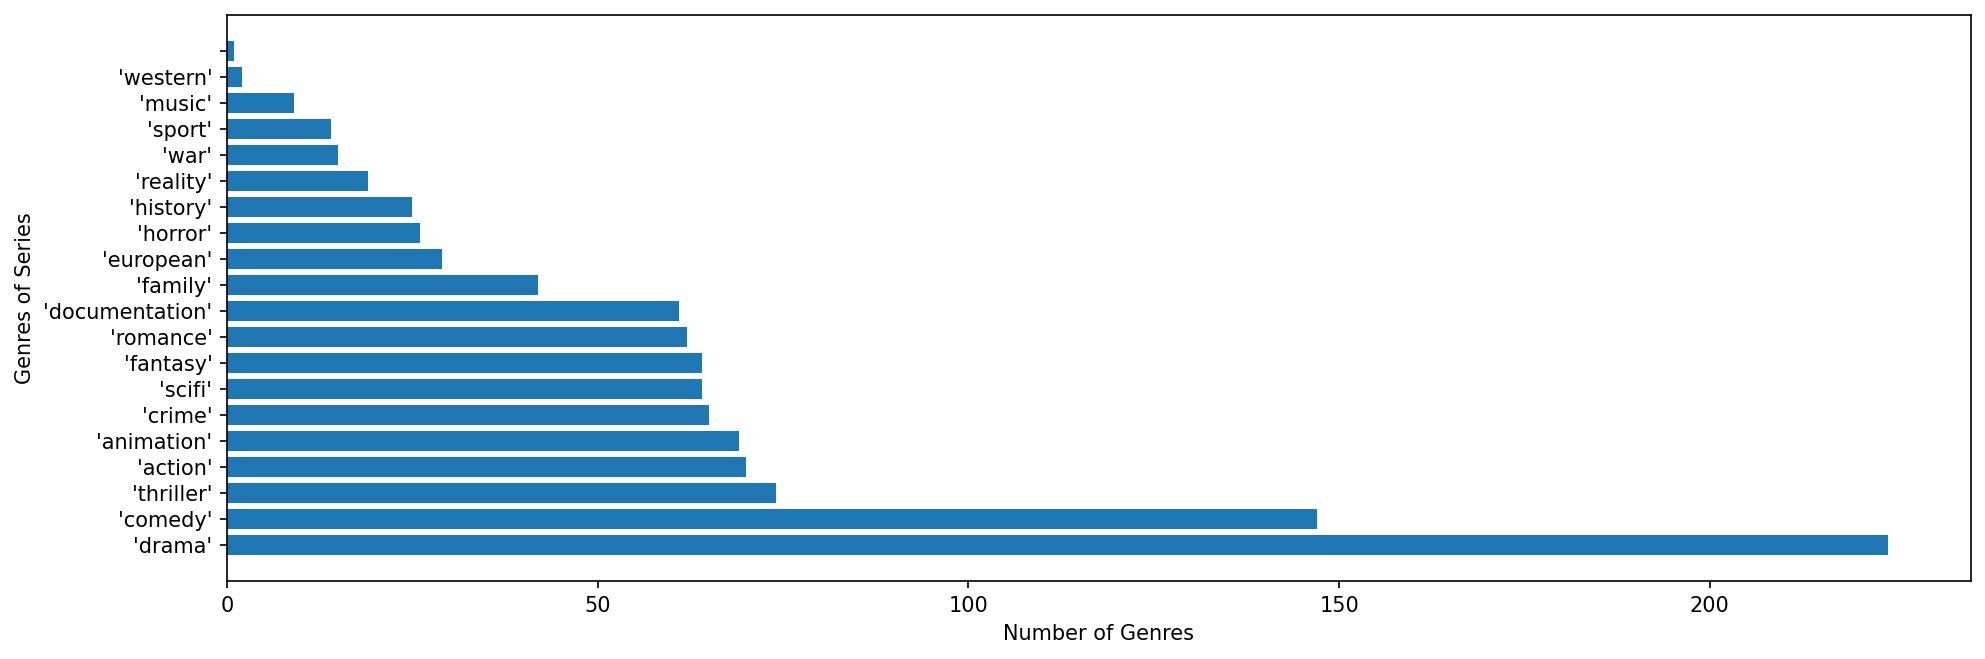

In [104]:
#show_genres
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=show_genres['index'],
          width=show_genres['count'])
plt.xlabel("Number of Genres")
plt.ylabel("Genres of Series") 

(-1.25, 2.45)

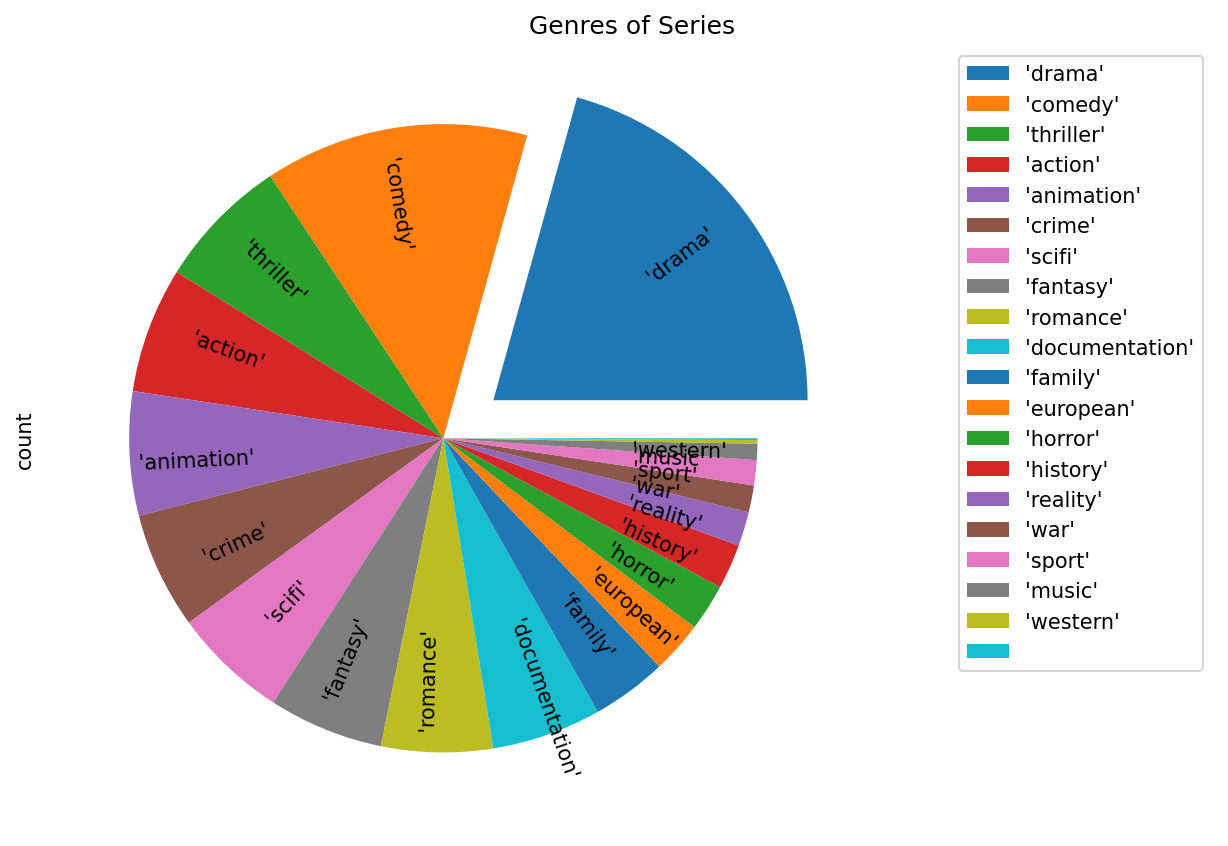

In [105]:
plt.figure(figsize=(10,7),dpi=150)
ax = plt.gca()

# Plot
explode_val = pd.Series( [0.0] * show_genres.shape[0] )
explode_val[:] = 0    # Set initial explode values of all wedges as 0
explode_val[0] = 0.2  # Set the explode value of the first wedge as 0.2
show_genres.plot( kind='pie',
             y='count',       # The column that specifies wedges size (1D array)
             labels=show_genres['index'],      # Labels of each wedge
             radius=1,           # Radius of the pie (default:1)
             explode=explode_val,  # How far from the center each wedge is displayed (default:0)
             labeldistance=0.6,    # The radius distance at which labels are drawn(default:1.1)
             rotatelabels=True,    # Rotate each label according to its corresponding wedge
             title = 'Genres of Series',
             ax=ax
          )

# Lengthen the x-axis so that the legend doesn't overlap with data
left, right = ax.get_xlim()    # Get the current left and right limits
ax.set_xlim(left , right+1.2)   # Set xlim to the new values

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

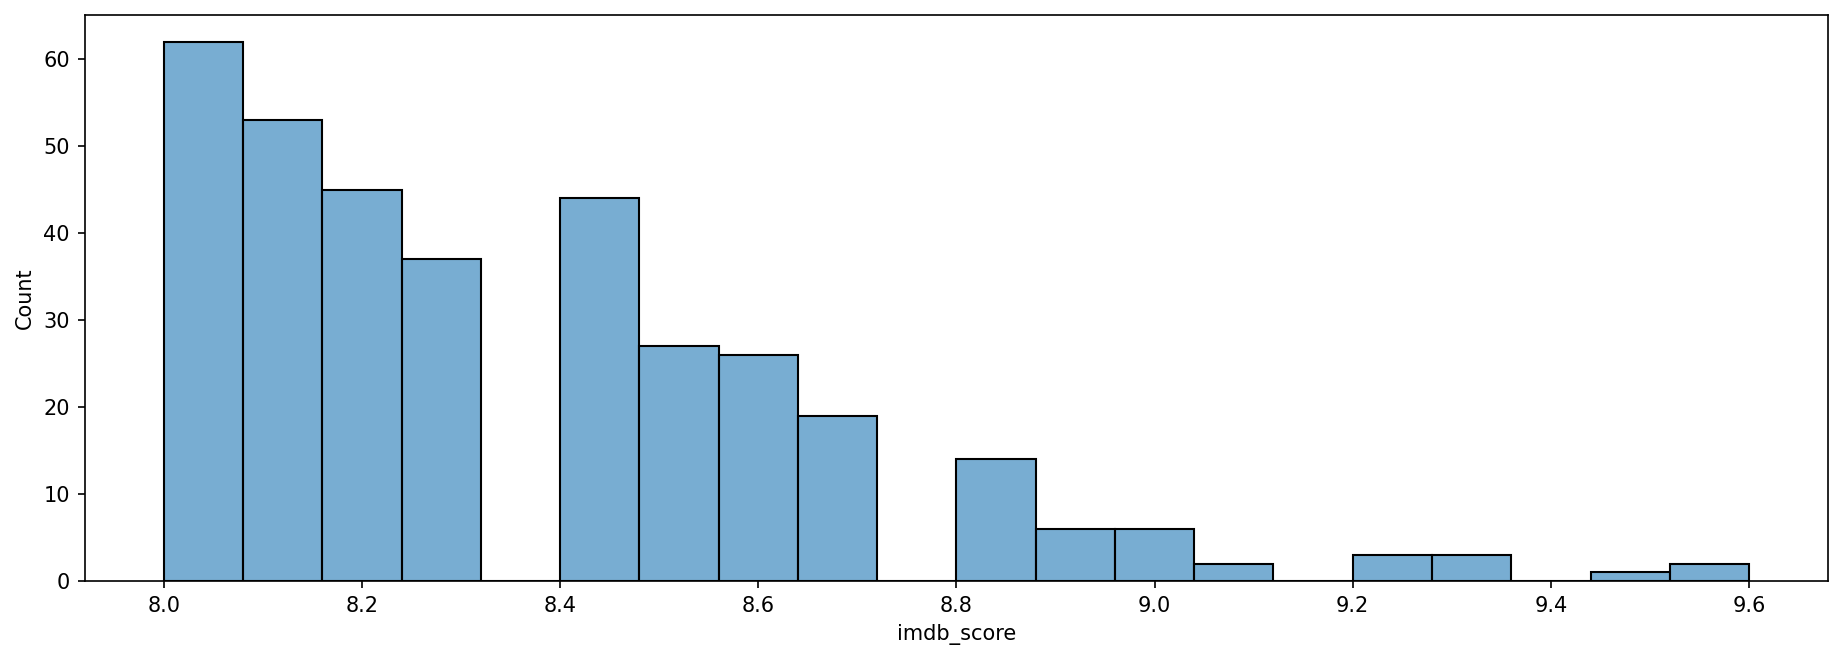

In [106]:
plt.figure(figsize=(15,5), dpi=150)
ax = plt.gca()
sns.histplot(data=df_show_8, x='imdb_score', bins=20, alpha=0.6, ax=ax )

Text(0, 0.5, 'Title of Series')

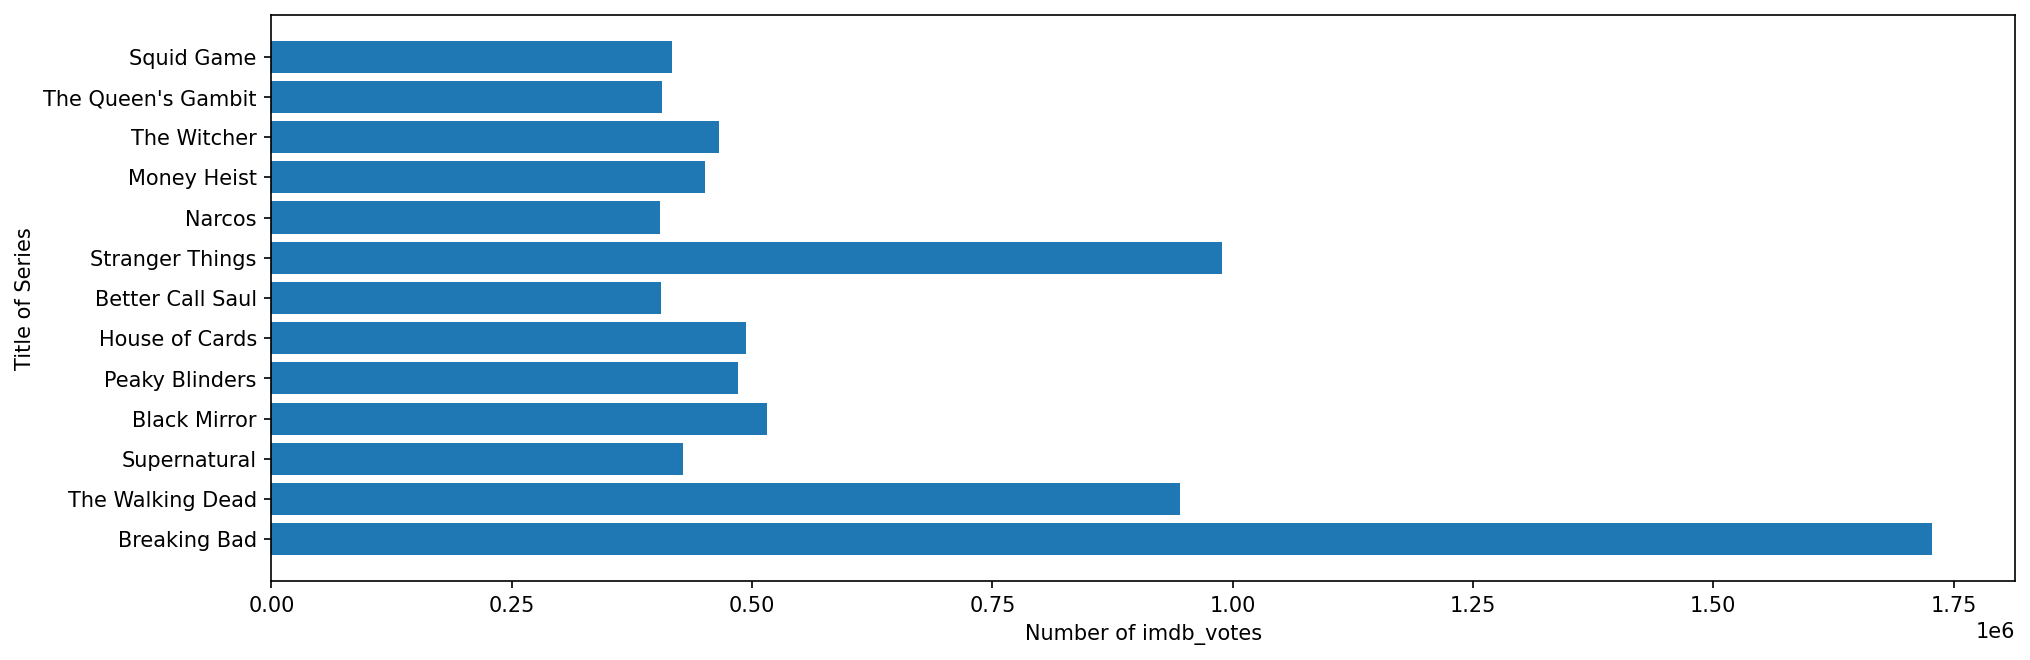

In [107]:
# df_show_8 imdb_votes>=400000
df_show_top_vote = df_show_8[df_show_8['imdb_votes']>=400000]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=df_show_top_vote['title'],
          width=df_show_top_vote['imdb_votes'] )
plt.xlabel("Number of imdb_votes")
plt.ylabel("Title of Series")  

Text(0, 0.5, 'Title of Series')

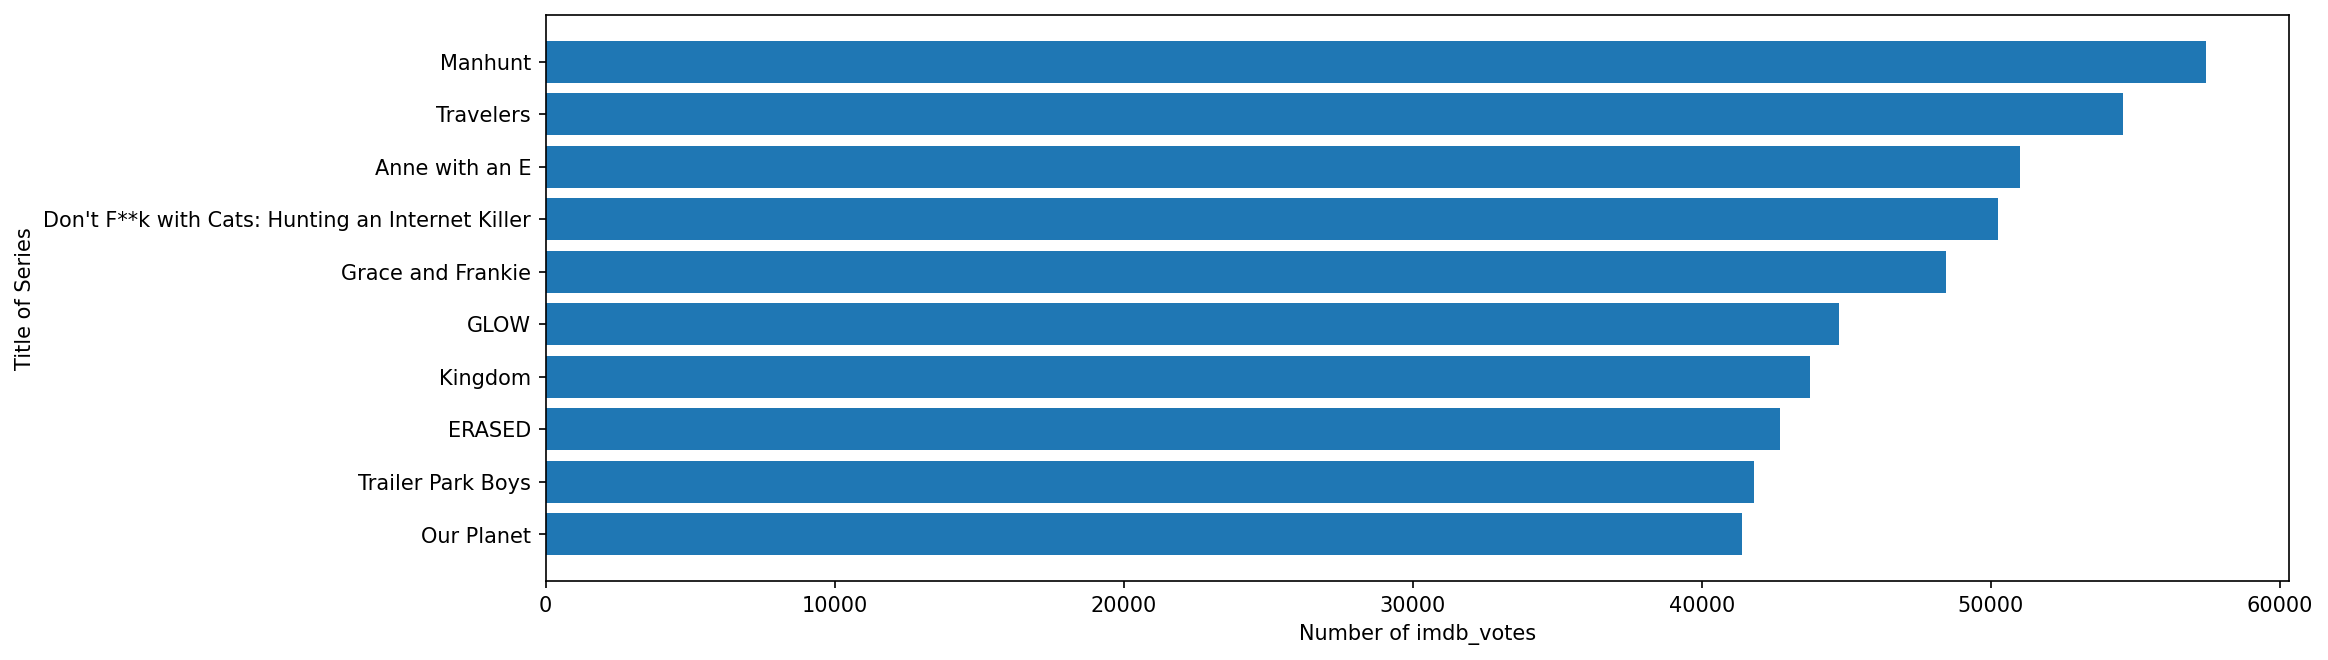

In [108]:
# df_votes_8_lessmean imdb_votes>=40000
df_show_top_vote = df_votes_8_lessmean[df_votes_8_lessmean['imdb_votes']>=40000]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=df_show_top_vote['title'],
          width=df_show_top_vote['imdb_votes'] )
plt.xlabel("Number of imdb_votes")
plt.ylabel("Title of Series") 

Text(0, 0.5, 'Title of Series')

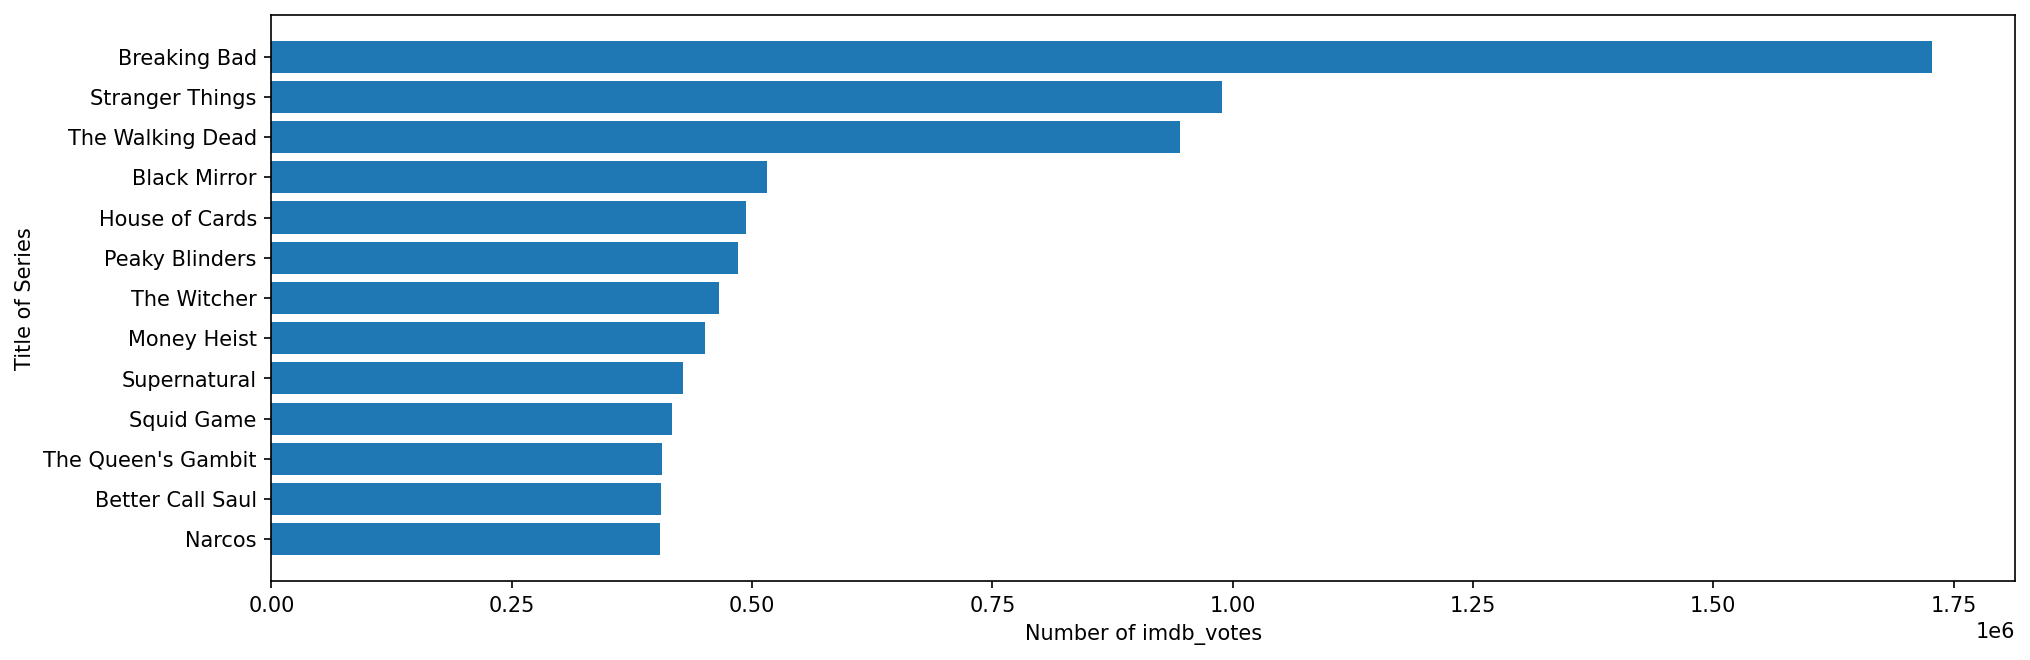

In [109]:
# df_votes_8_moremean imdb_votes>=400000
df_show_top10_vote = df_votes_8_moremean[df_votes_8_moremean['imdb_votes']>=400000]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=df_show_top10_vote['title'],
          width=df_show_top10_vote['imdb_votes'] )
plt.xlabel("Number of imdb_votes") # Add x-labels
plt.ylabel("Title of Series")    

## df_movie

In [110]:
df_movie = df_titles.loc[df_titles['type'] == 'MOVIE']
df_movie

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
6,6,tm14873,Dirty Harry,MOVIE,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,5798,tm1004011,Time to Dance,MOVIE,2021,NaN,107,"['drama', 'romance']",['IN'],NaN,tt8622232,2.2,950.0
5800,5800,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,['comedy'],['PH'],NaN,tt14412240,5.8,26.0
5801,5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5803,5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0


In [111]:
df_movie = df_movie.drop(columns=['seasons'])

In [112]:
df_movie.isna().sum()

index                      0
id                         0
title                      0
type                       0
release_year               0
age_certification       2072
runtime                    0
genres                     0
production_countries       0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
dtype: int64

In [113]:
#เลือกข้อมูลมาแค่แถว ที่ imdb_score มากกว่าเท่ากับ 8
df_movie_8 = df_movie[df_movie['imdb_score'] >= 8]
df_movie_8.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],tt0070047,8.1,391942.0
13,13,tm69997,Richard Pryor: Live in Concert,MOVIE,1979,R,78,"['comedy', 'documentation']",['US'],tt0079807,8.1,5141.0


In [114]:
df_movie_8=df_movie_8.sort_values(by='imdb_votes',ascending=True)
df_movie_8

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
4430,4430,tm835414,Sitara,MOVIE,2019,NaN,128,"['drama', 'animation']",['IN'],tt7654668,8.0,5.0
876,876,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,2011,G,66,"['animation', 'action', 'fantasy']",['IN'],tt16235600,9.0,5.0
1211,1211,tm529733,Chhota Bheem and the ShiNobi Secret,MOVIE,2013,G,63,['animation'],['IN'],tt6417830,8.6,6.0
1208,1208,tm528044,Chhota Bheem Neeli Pahaadi,MOVIE,2013,G,63,['animation'],[],tt6442694,8.5,9.0
1202,1202,tm250247,Chhota Bheem & Krishna vs Zimbara,MOVIE,2013,G,64,['animation'],[],tt6417984,8.6,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
111,111,tm57554,Saving Private Ryan,MOVIE,1998,R,169,"['drama', 'war']",['US'],tt0120815,8.6,1346020.0
706,706,tm41792,Django Unchained,MOVIE,2012,R,165,"['western', 'drama']",['US'],tt1853728,8.4,1472668.0
108,108,tm122434,Forrest Gump,MOVIE,1994,PG-13,142,"['drama', 'romance', 'comedy']",['US'],tt0109830,8.8,1994599.0


In [115]:
mean_movie_8 = df_movie_8['imdb_votes'].mean()
mean_movie_8

134331.7548387097

In [116]:
df_movie_votes_8_lessmean=df_movie_8[df_movie_8['imdb_votes']<mean_vote_8]
df_movie_votes_8_lessmean.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
4430,4430,tm835414,Sitara,MOVIE,2019,NaN,128,"['drama', 'animation']",['IN'],tt7654668,8.0,5.0
876,876,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,2011,G,66,"['animation', 'action', 'fantasy']",['IN'],tt16235600,9.0,5.0
1211,1211,tm529733,Chhota Bheem and the ShiNobi Secret,MOVIE,2013,G,63,['animation'],['IN'],tt6417830,8.6,6.0
1208,1208,tm528044,Chhota Bheem Neeli Pahaadi,MOVIE,2013,G,63,['animation'],[],tt6442694,8.5,9.0
1202,1202,tm250247,Chhota Bheem & Krishna vs Zimbara,MOVIE,2013,G,64,['animation'],[],tt6417984,8.6,13.0


In [117]:
df_movie_votes_8_lessmean.sort_values(by='imdb_score',ascending=False)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
25,25,tm76557,No Longer Kids,MOVIE,1979,NaN,235,"['comedy', 'drama']",['EG'],tt8312792,9.0,943.0
2814,2814,tm432327,C/o Kancharapalem,MOVIE,2018,PG,152,['drama'],['IN'],tt7391996,9.0,6562.0
3352,3352,tm853783,David Attenborough: A Life on Our Planet,MOVIE,2020,PG,83,['documentation'],['GB'],tt11989890,9.0,31180.0
876,876,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,2011,G,66,"['animation', 'action', 'fantasy']",['IN'],tt16235600,9.0,5.0
4473,4473,tm907872,Sky Tour: The Movie,MOVIE,2020,NaN,94,"['documentation', 'music']",[],tt12486200,8.8,1036.0
...,...,...,...,...,...,...,...,...,...,...,...,...
776,776,tm182586,Silenced,MOVIE,2011,NaN,125,['drama'],['KR'],tt2070649,8.0,15889.0
1019,1019,tm171965,Mike Birbiglia: My Girlfriend's Boyfriend,MOVIE,2013,NaN,75,"['drama', 'documentation', 'comedy', 'romance']",['US'],tt2937390,8.0,3284.0
2339,2339,tm443993,"Take the Ball, Pass the Ball",MOVIE,2018,NaN,107,"['documentation', 'sport', 'european']",['ES'],tt9135854,8.0,3064.0
5653,5653,tm1039168,Cinema Bandi,MOVIE,2021,NaN,98,"['comedy', 'drama']",['IN'],tt14558738,8.0,2416.0


In [118]:
df_movie_votes_8_lessmean.sort_values(by='imdb_votes',ascending=False).head(10)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
834,834,tm47171,OMG: Oh My God!,MOVIE,2012,G,125,"['fantasy', 'drama', 'comedy']",['IN'],tt2283748,8.1,57449.0
1107,1107,tm175812,Special 26,MOVIE,2013,NaN,144,"['thriller', 'crime', 'drama']",['IN'],tt2377938,8.0,55489.0
1058,1058,tm148910,Haider,MOVIE,2014,PG-13,150,"['drama', 'action', 'crime', 'thriller']",['IN'],tt3390572,8.1,54001.0
156,156,tm190835,Neon Genesis Evangelion: The End of Evangelion,MOVIE,1997,NaN,87,"['scifi', 'action', 'drama', 'fantasy', 'anima...",['JP'],tt0169858,8.0,51938.0
3215,3215,tm863808,My Octopus Teacher,MOVIE,2020,NaN,84,['documentation'],"['ZA', 'GB']",tt12888462,8.1,51232.0
3816,3816,tm812998,Miracle in Cell No. 7,MOVIE,2019,NaN,132,['drama'],['TR'],tt10431500,8.2,46939.0
607,607,tm103732,Udaan,MOVIE,2010,R,138,['drama'],['IN'],tt1639426,8.1,44556.0
4944,4944,tm1038686,Bo Burnham: Inside,MOVIE,2021,R,87,"['comedy', 'drama', 'music', 'reality']",['US'],tt14545352,8.7,44074.0
534,534,tm51493,Vizontele,MOVIE,2001,NaN,110,"['comedy', 'drama']",['TR'],tt0270053,8.0,36291.0
844,844,tm35700,Paan Singh Tomar,MOVIE,2012,PG,135,"['drama', 'sport', 'thriller', 'action', 'crime']",['IN'],tt1620933,8.2,35888.0


In [119]:
df_movie_votes_8_moremean = df_movie_8[df_movie_8['imdb_votes']>=mean_vote_8]
df_movie_votes_8_moremean.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
553,553,tm82718,G.O.R.A.,MOVIE,2004,PG-13,127,"['scifi', 'comedy']",['TR'],tt0384116,8.0,61797.0
1073,1073,tm156811,Queen,MOVIE,2014,PG-13,146,"['drama', 'comedy']",['IN'],tt3322420,8.2,64805.0
484,484,tm61056,Dil Chahta Hai,MOVIE,2001,G,183,"['drama', 'comedy', 'romance']",['IN'],tt0292490,8.1,71167.0
1276,1276,tm233425,A Silent Voice: The Movie,MOVIE,2016,PG-13,130,"['romance', 'animation', 'drama', 'family']",['JP'],tt5323662,8.1,75132.0
791,791,tm182125,Zindagi Na Milegi Dobara,MOVIE,2011,PG,166,"['comedy', 'drama']",['IN'],tt1562872,8.1,75801.0


In [120]:
df_movie_votes_8_moremean.count()

index                   42
id                      42
title                   42
type                    42
release_year            42
age_certification       40
runtime                 42
genres                  42
production_countries    42
imdb_id                 42
imdb_score              42
imdb_votes              42
dtype: int64

In [121]:
df_movie_votes_8_moremean.sort_values(by='imdb_score',ascending=False).head(10)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
260,260,tm92641,Inception,MOVIE,2010,PG-13,148,"['scifi', 'music', 'thriller', 'action']","['GB', 'US']",tt1375666,8.8,2268288.0
108,108,tm122434,Forrest Gump,MOVIE,1994,PG-13,142,"['drama', 'romance', 'comedy']",['US'],tt0109830,8.8,1994599.0
111,111,tm57554,Saving Private Ryan,MOVIE,1998,R,169,"['drama', 'war']",['US'],tt0120815,8.6,1346020.0
1375,1375,tm245671,Dangal,MOVIE,2016,PG,161,"['action', 'drama', 'sport']",['IN'],tt5074352,8.4,180247.0
368,368,tm142564,3 Idiots,MOVIE,2009,PG-13,170,"['comedy', 'drama']",['IN'],tt1187043,8.4,385782.0
706,706,tm41792,Django Unchained,MOVIE,2012,R,165,"['western', 'drama']",['US'],tt1853728,8.4,1472668.0
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
52,52,tm22327,Full Metal Jacket,MOVIE,1987,R,116,"['drama', 'war']","['GB', 'US']",tt0093058,8.3,723306.0
414,414,tm83786,Like Stars on Earth,MOVIE,2007,PG,165,"['drama', 'family']",['IN'],tt0986264,8.3,188234.0
49,49,tm180542,Once Upon a Time in America,MOVIE,1984,R,229,"['drama', 'crime', 'european']","['US', 'IT']",tt0087843,8.3,342335.0


In [122]:
df_movie_votes_8_moremean.sort_values(by='imdb_votes',ascending=False).head(10)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
260,260,tm92641,Inception,MOVIE,2010,PG-13,148,"['scifi', 'music', 'thriller', 'action']","['GB', 'US']",tt1375666,8.8,2268288.0
108,108,tm122434,Forrest Gump,MOVIE,1994,PG-13,142,"['drama', 'romance', 'comedy']",['US'],tt0109830,8.8,1994599.0
706,706,tm41792,Django Unchained,MOVIE,2012,R,165,"['western', 'drama']",['US'],tt1853728,8.4,1472668.0
111,111,tm57554,Saving Private Ryan,MOVIE,1998,R,169,"['drama', 'war']",['US'],tt0120815,8.6,1346020.0
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
927,927,tm140877,The Imitation Game,MOVIE,2014,PG-13,113,"['thriller', 'drama', 'war']","['US', 'GB']",tt2084970,8.0,748654.0
52,52,tm22327,Full Metal Jacket,MOVIE,1987,R,116,"['drama', 'war']","['GB', 'US']",tt0093058,8.3,723306.0
262,262,tm87484,How to Train Your Dragon,MOVIE,2010,PG,98,"['fantasy', 'animation', 'action', 'comedy', '...",['US'],tt0892769,8.1,719717.0
264,264,tm39030,Casino Royale,MOVIE,2006,NaN,139,"['thriller', 'action', 'european']","['GB', 'US', 'BS', 'CZ', 'DE']",tt0381061,8.0,644336.0
282,282,tm79442,The Bourne Ultimatum,MOVIE,2007,PG-13,115,"['thriller', 'action']","['DE', 'ES', 'US', 'FR']",tt0440963,8.0,627009.0


In [123]:
df_movie_8.genres = df_movie_8.genres.str[1:-1].str.split(',')

In [124]:
movie_genres = pd.Series(sum([item for item in df_movie_8.genres], [])).str.replace(' ', '').value_counts().to_frame('count')
movie_genres

,count
'drama',84
'comedy',53
'documentation',48
'action',22
'thriller',22
'romance',18
'crime',18
'animation',13
'fantasy',12
'music',10


In [125]:
movie_genres = movie_genres.reset_index()
movie_genres

,index,count
0,'drama',84
1,'comedy',53
2,'documentation',48
3,'action',22
4,'thriller',22
5,'romance',18
6,'crime',18
7,'animation',13
8,'fantasy',12
9,'music',10


In [126]:
df_movie_8 = df_movie[df_movie['imdb_score'] >= 8]
df_movie_8.loc[ df_movie_8['genres'].str.contains('drama', case=False)].sort_values(by='imdb_votes',ascending=False).head(1)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
108,108,tm122434,Forrest Gump,MOVIE,1994,PG-13,142,"['drama', 'romance', 'comedy']",['US'],tt0109830,8.8,1994599.0


In [127]:
df_movie_8.loc[ df_movie_8['genres'].str.contains('crime', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index                   18
id                      18
title                   18
type                    18
release_year            18
age_certification       11
runtime                 18
genres                  18
production_countries    18
imdb_id                 18
imdb_score              18
imdb_votes              18
dtype: int64

In [128]:
df_movie_8.loc[ df_movie_8['genres'].str.contains('music', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index                   10
id                      10
title                   10
type                    10
release_year            10
age_certification        5
runtime                 10
genres                  10
production_countries    10
imdb_id                 10
imdb_score              10
imdb_votes              10
dtype: int64

In [129]:
df_movie_8.loc[ df_movie_8['genres'].str.contains('thriller', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index                   22
id                      22
title                   22
type                    22
release_year            22
age_certification       12
runtime                 22
genres                  22
production_countries    22
imdb_id                 22
imdb_score              22
imdb_votes              22
dtype: int64

In [130]:
df_movie_8.loc[ df_movie_8['genres'].str.contains('comedy', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index                   53
id                      53
title                   53
type                    53
release_year            53
age_certification       25
runtime                 53
genres                  53
production_countries    53
imdb_id                 53
imdb_score              53
imdb_votes              53
dtype: int64

In [131]:
df_movie_8.loc[ df_movie_8['genres'].str.contains('scifi', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index                   7
id                      7
title                   7
type                    7
release_year            7
age_certification       5
runtime                 7
genres                  7
production_countries    7
imdb_id                 7
imdb_score              7
imdb_votes              7
dtype: int64

Text(0, 0.5, 'Genres of Movies')

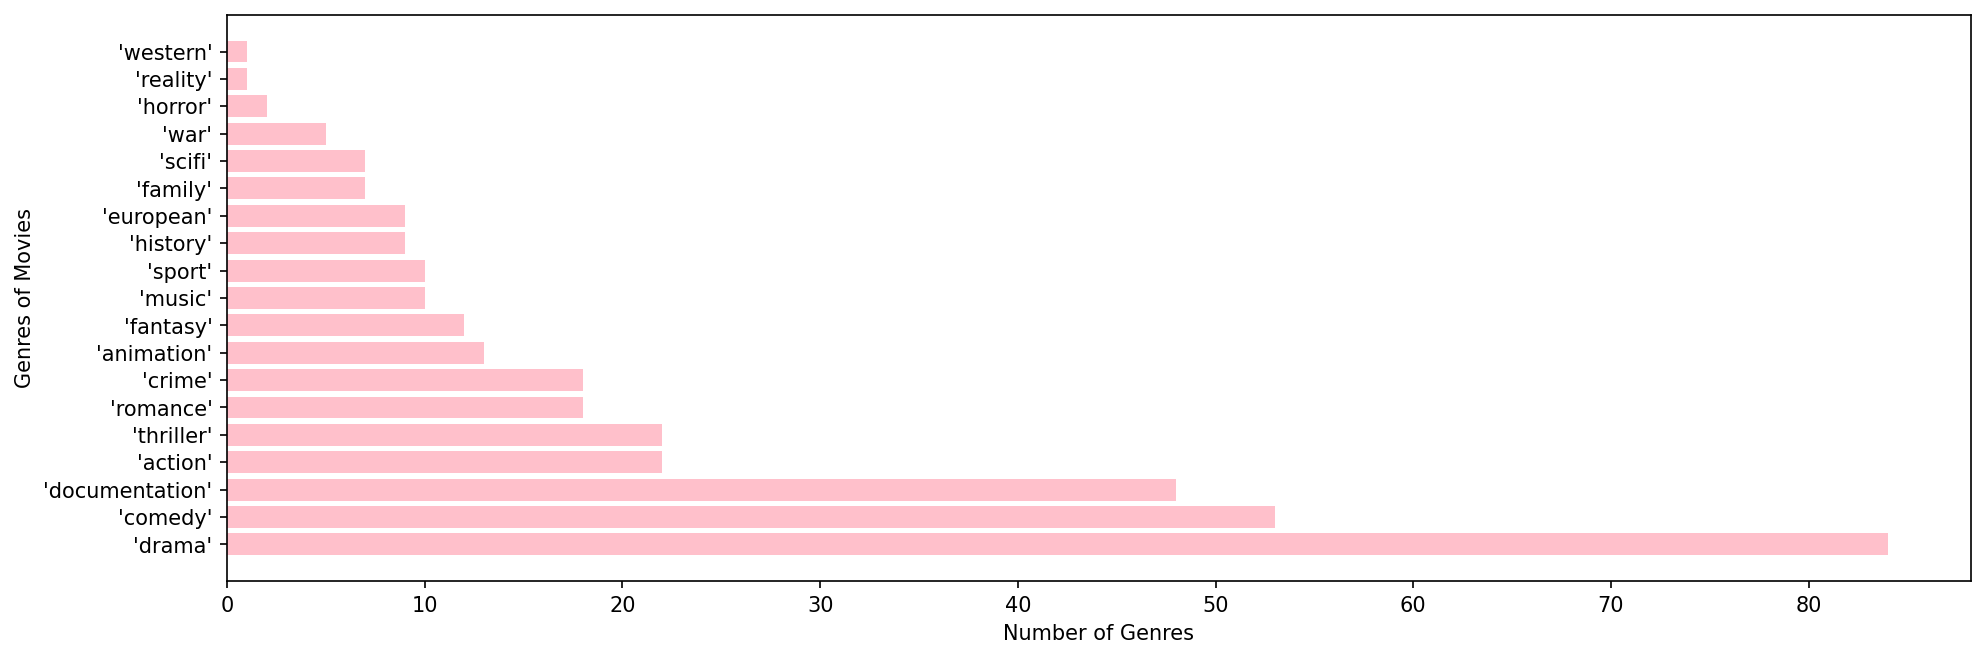

In [132]:
#movie_genres
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=movie_genres['index'],
          width=movie_genres['count'],
          color = 'pink' )
plt.xlabel("Number of Genres")
plt.ylabel("Genres of Movies") 

Text(0, 0.5, 'Genres of Movies')

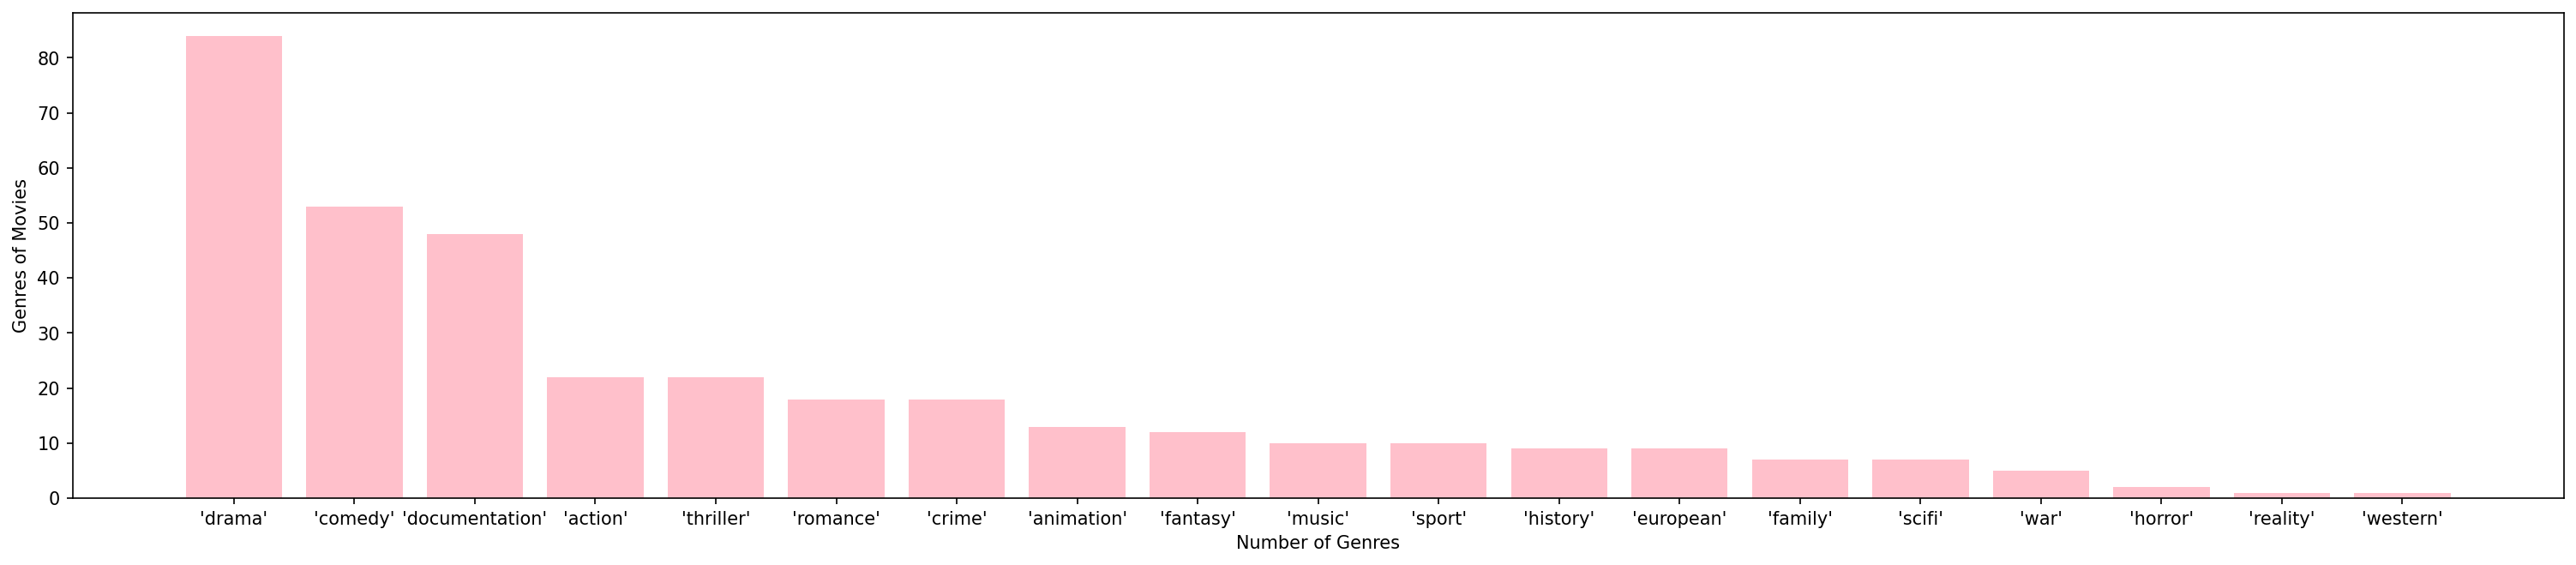

In [133]:
#movie_genres
plt.figure(figsize=(25,5),dpi=150)
plt.bar( x=movie_genres['index'],
          height=movie_genres['count'],
          color = 'pink' )
plt.xlabel("Number of Genres")
plt.ylabel("Genres of Movies") 

(-1.25, 2.45)

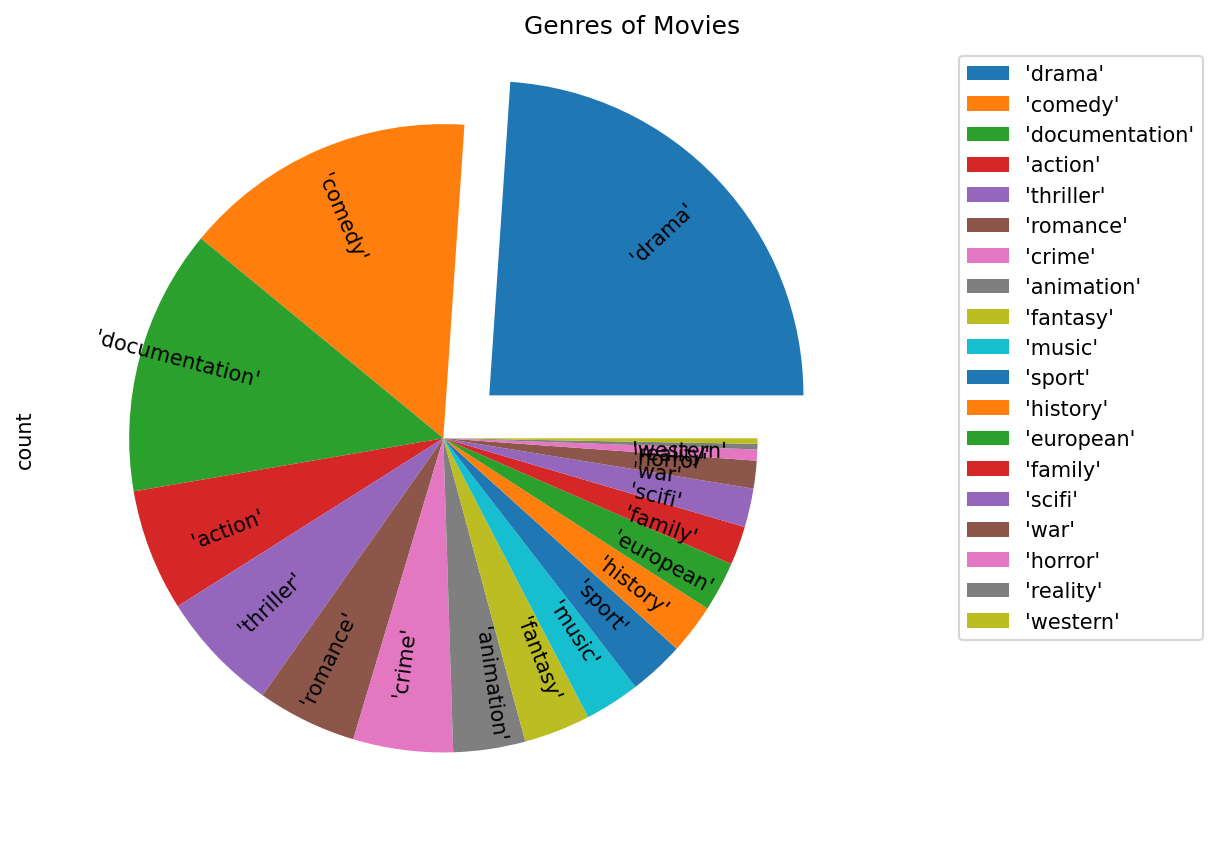

In [134]:
plt.figure(figsize=(10,7),dpi=150)
ax = plt.gca()

# Plot
explode_val = pd.Series( [0.0] * movie_genres.shape[0] )
explode_val[:] = 0    # Set initial explode values of all wedges as 0
explode_val[0] = 0.2  # Set the explode value of the first wedge as 0.2
movie_genres.plot( kind='pie',
             y='count',       # The column that specifies wedges size (1D array)
             labels=movie_genres['index'],      # Labels of each wedge
             radius=1,           # Radius of the pie (default:1)
             explode=explode_val,  # How far from the center each wedge is displayed (default:0)
             labeldistance=0.6,    # The radius distance at which labels are drawn(default:1.1)
             rotatelabels=True,    # Rotate each label according to its corresponding wedg
             title = 'Genres of Movies',
             ax=ax
          )

# Lengthen the x-axis so that the legend doesn't overlap with data
left, right = ax.get_xlim()    # Get the current left and right limits
ax.set_xlim(left, right+1.2)   # Set xlim to the new values

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

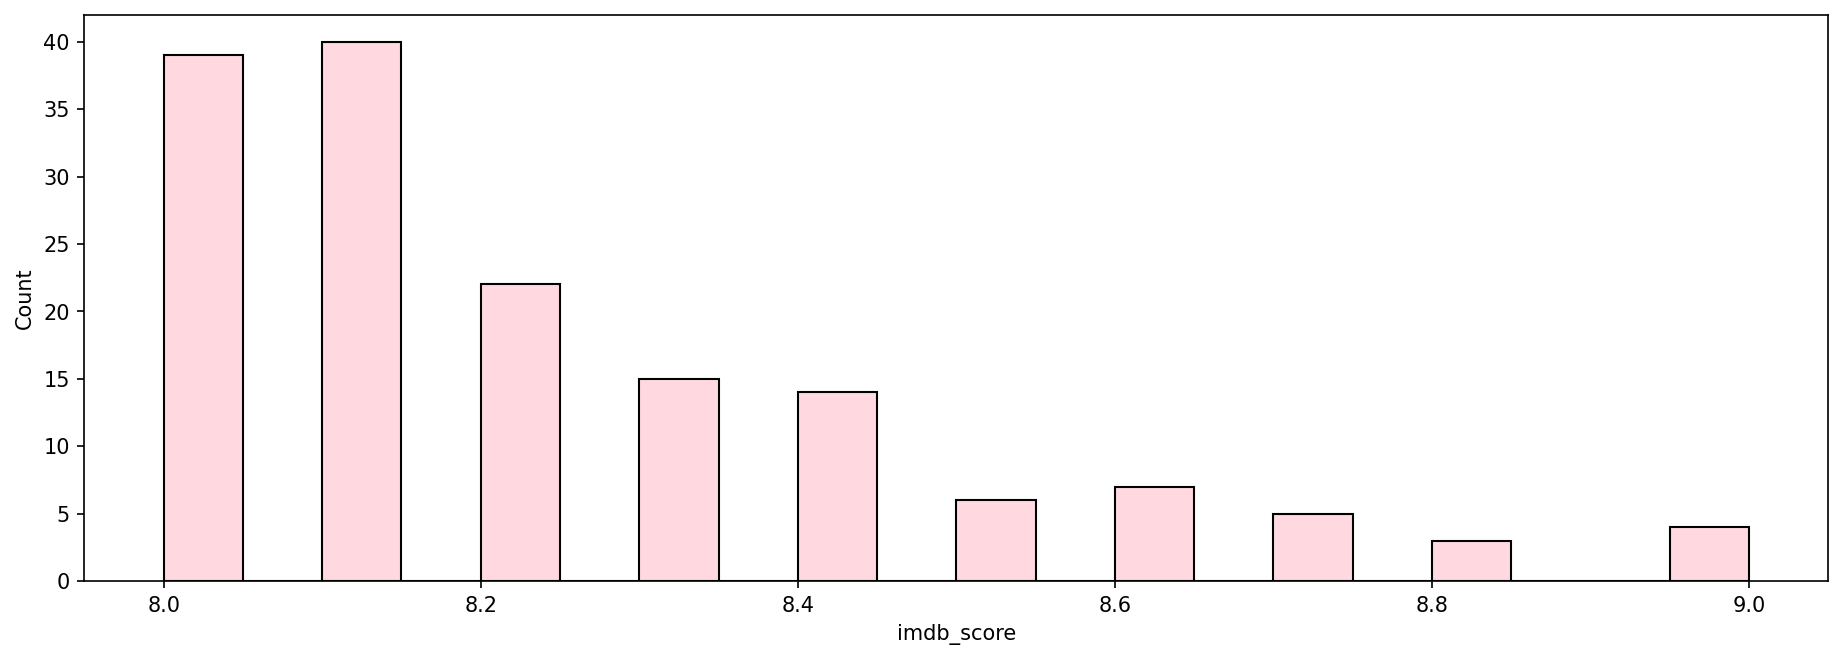

In [135]:
plt.figure(figsize=(15,5), dpi=150)
ax = plt.gca()
sns.histplot(data=df_movie_8, x='imdb_score', bins=20, alpha=0.6, ax=ax, color = 'pink' )

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

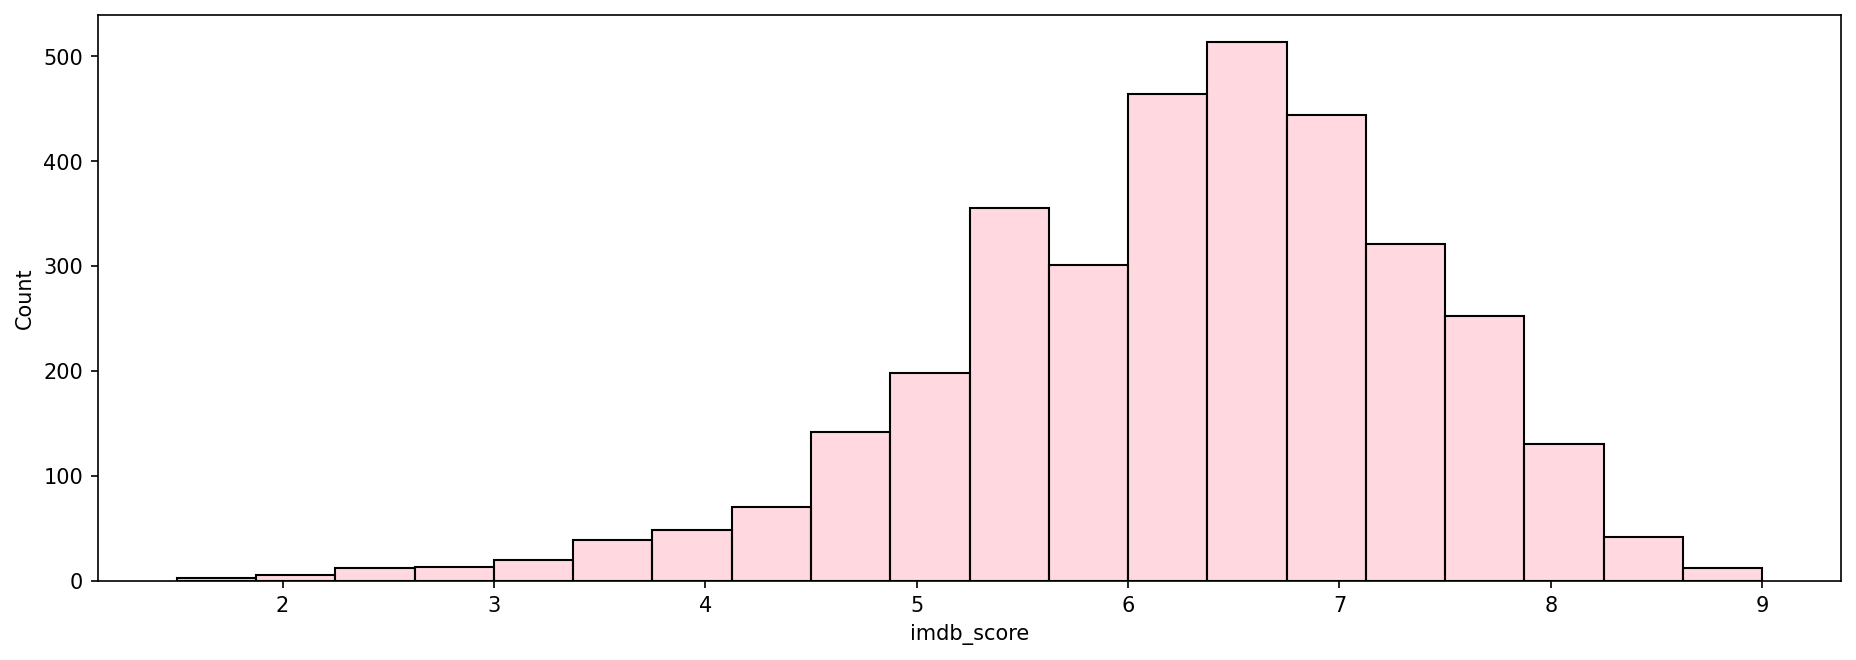

In [136]:
plt.figure(figsize=(15,5), dpi=150)
ax = plt.gca()
sns.histplot(data=df_movie, x='imdb_score', bins=20, alpha=0.6, ax=ax, color = 'pink' )

Text(0, 0.5, 'Title of Movies')

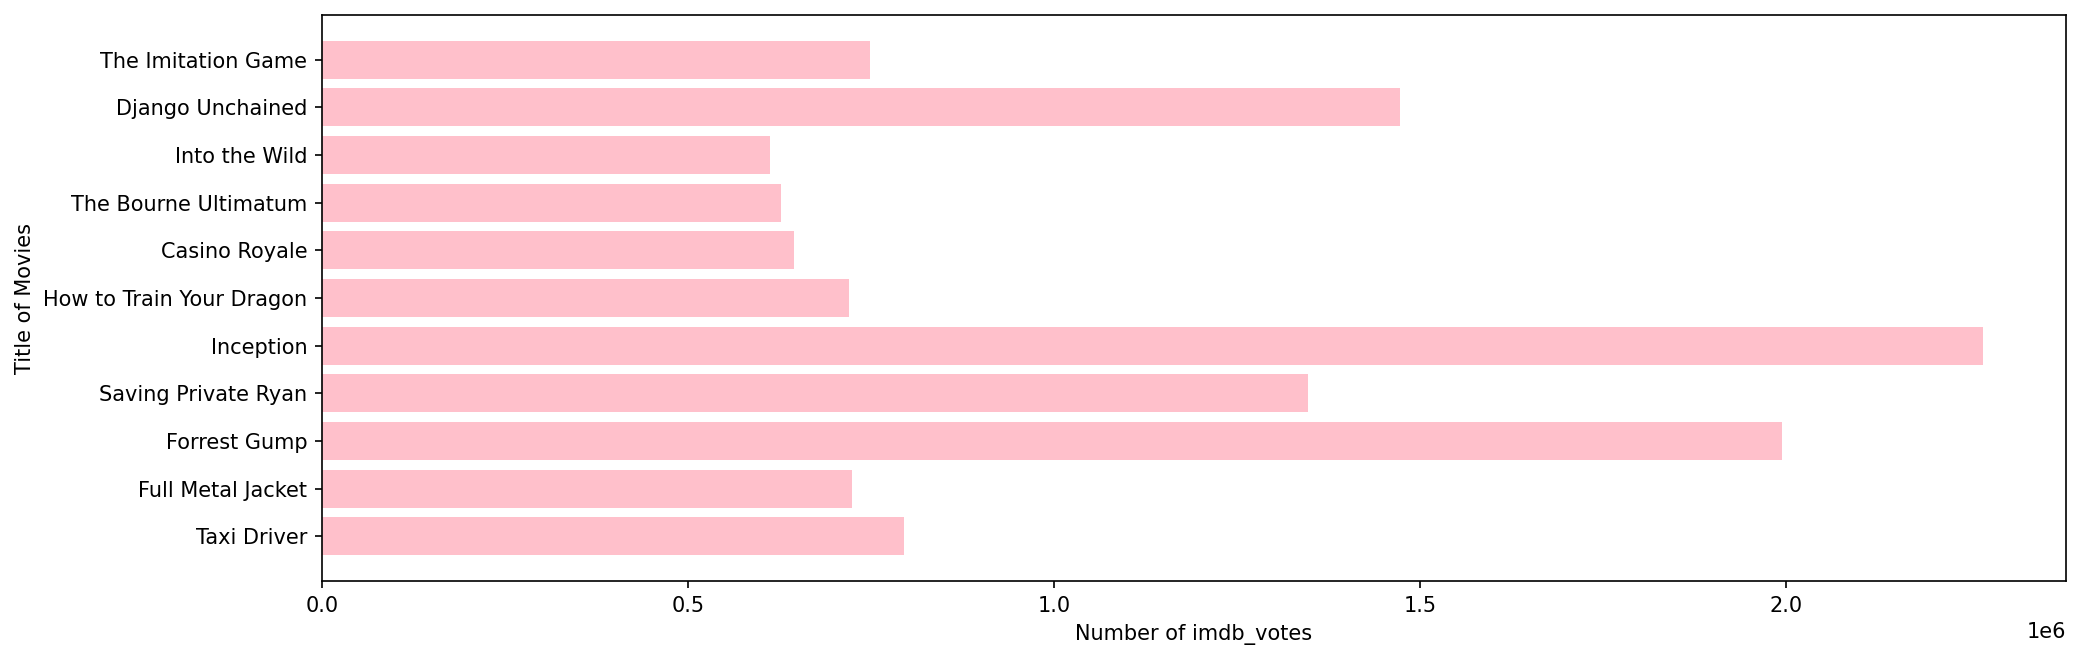

In [137]:
# df_movie_8 imdb_votes>=600000
df_movie_top10_vote = df_movie_8[df_movie_8['imdb_votes']>=600000]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=df_movie_top10_vote['title'],
          width=df_movie_top10_vote['imdb_votes'],
          color = 'pink' )
plt.xlabel("Number of imdb_votes")
plt.ylabel("Title of Movies") 

Text(0, 0.5, 'Title of Movies')

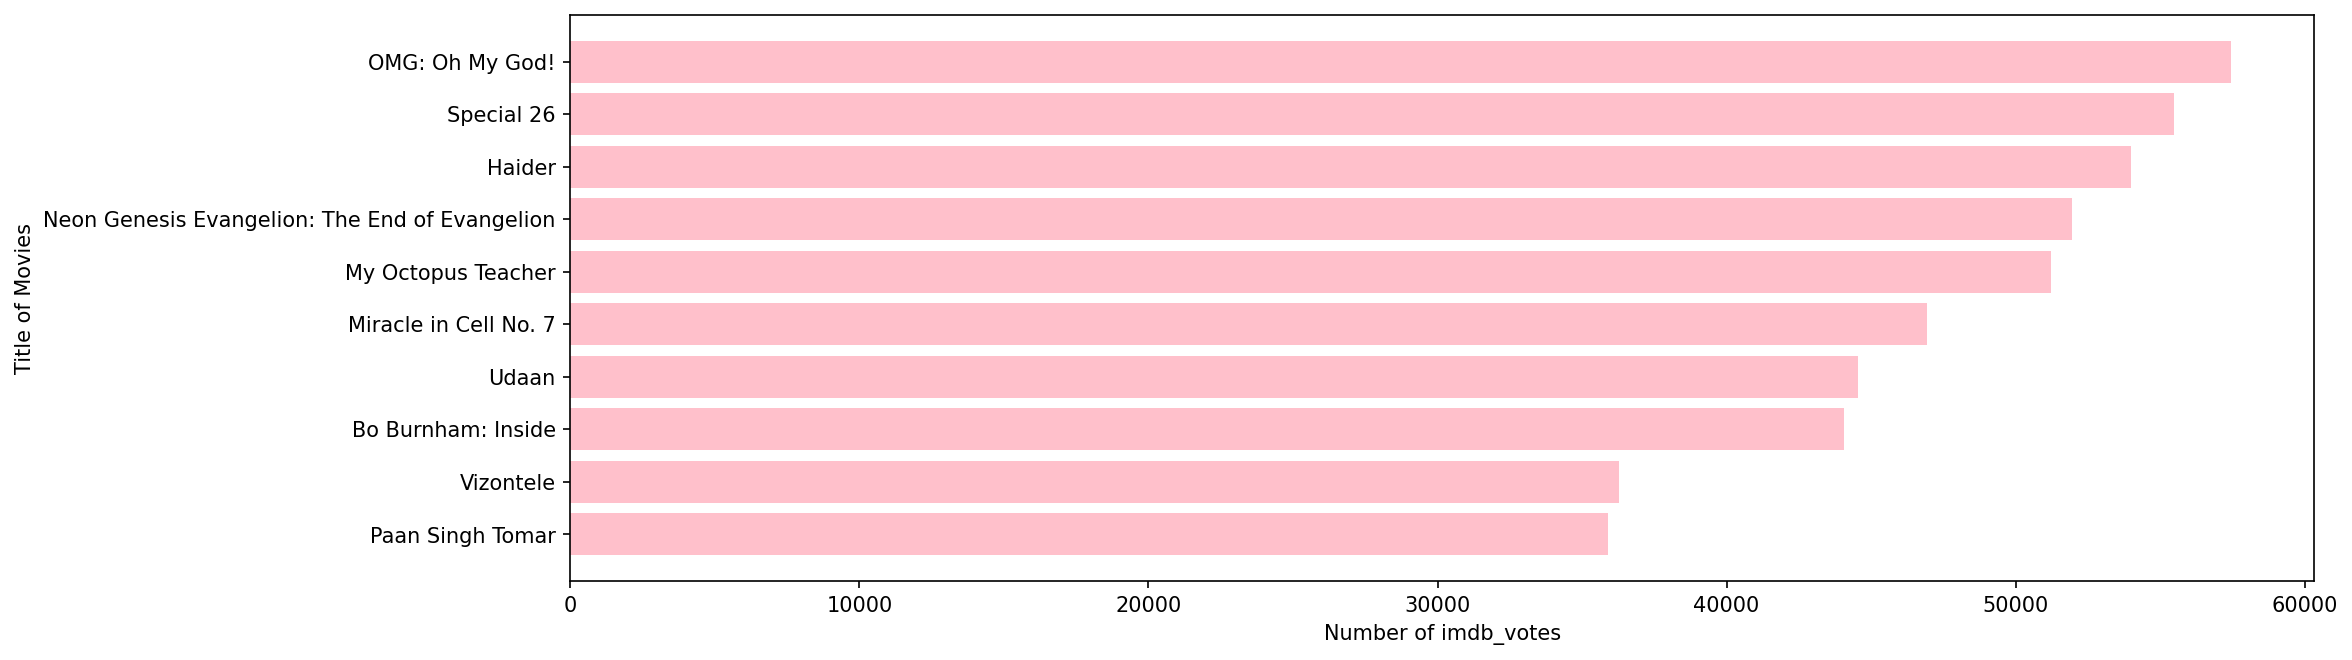

In [138]:
# df_movie_votes_8_lessmean imdb_votes>=35000
df_movie_top10_vote = df_movie_votes_8_lessmean[df_movie_votes_8_lessmean['imdb_votes']>=35000]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=df_movie_top10_vote['title'],
          width=df_movie_top10_vote['imdb_votes'],
          color = 'pink' )
plt.xlabel("Number of imdb_votes")
plt.ylabel("Title of Movies") 

Text(0, 0.5, 'Title of Movies')

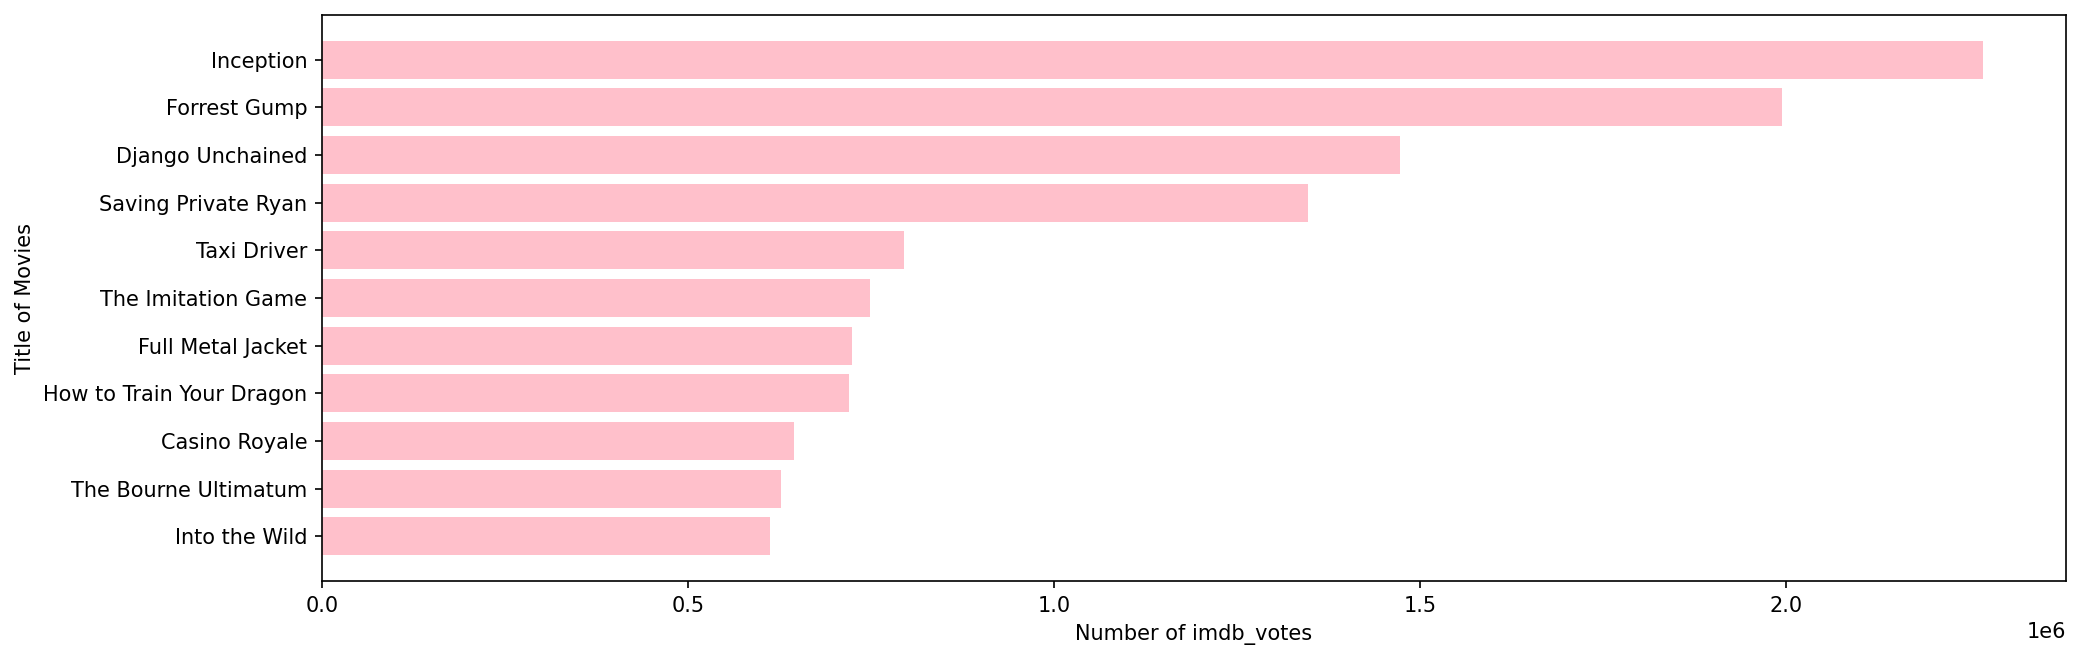

In [139]:
# df_movie_votes_8_moremean imdb_votes>=600000
df_movie_top10_vote = df_movie_votes_8_moremean[df_movie_votes_8_moremean['imdb_votes']>=600000]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=df_movie_top10_vote['title'],
          width=df_movie_top10_vote['imdb_votes'],
          color = 'pink' )
plt.xlabel("Number of imdb_votes")
plt.ylabel("Title of Movies") 

# country vs title

In [140]:
#ประเทศไหนผลิตซีรีย์เป็นที่นิยมมากสุด
#df_show_8['production_countries'].nunique()
num = df_show_8.groupby('production_countries')['id'].apply( lambda x: x.nunique() ).to_frame()
num

,id
production_countries,
['AR'],2
['AU'],9
['BE'],1
['BR'],1
['CA'],8
['CL'],1
"['CN', 'US']",1
['CN'],14
['CO'],6


In [141]:
#ประเทศไหนผลิตหนังเป็นที่นิยมมากสุด
num2 = df_movie_8.groupby('production_countries')['id'].apply( lambda x: x.nunique() ).to_frame()
num2

,id
production_countries,
['AR'],1
['AU'],1
['BR'],2
"['CA', 'HU', 'MX', 'ES', 'GB', 'US']",1
['CA'],2
"['CD', 'GB']",1
"['CU', 'US']",1
"['DE', 'ES', 'US', 'FR']",1
['EG'],3


In [142]:
#หนังหรือซีรีส์มีความนิยมมากกว่ากัน
df_movie_8['imdb_votes'].describe()

count    1.550000e+02
mean     1.343318e+05
std      3.284466e+05
min      5.000000e+00
25%      1.736500e+03
50%      9.475000e+03
75%      7.314950e+04
max      2.268288e+06
Name: imdb_votes, dtype: float64

In [143]:
df_show_8['imdb_votes'].describe()
#หนังนิยมกว่าดูจากมีน

count    3.500000e+02
mean     5.767010e+04
std      1.483926e+05
min      5.000000e+00
25%      1.877000e+03
50%      6.153000e+03
75%      4.059750e+04
max      1.727694e+06
Name: imdb_votes, dtype: float64

In [172]:
#หนังหรือซีรีส์มีความนิยมมากกว่ากัน
df_show_8['imdb_votes'].sum()

20184536.0

In [173]:
df_movie_8['imdb_votes'].sum()

20821422.0

## df_credits

In [146]:
#ความนิยมของนักแสดงหรือผู้กำกับมีผลกับความนิยมหรือไม่
df_credits = pd.read_csv('raw_credits.csv')  
df_credits

,index,person_id,id,name,character,role
0,0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...,...
77208,77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR
77209,77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR
77210,77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR
77211,77211,2050199,tm1098060,Mistura Olusanya,Nurse Titi,ACTOR


In [147]:
people = df_credits['name'].value_counts().to_frame('count_people')
people.reset_index().head(10)

,index,count_people
0,Shah Rukh Khan,30
1,Anupam Kher,25
2,Boman Irani,25
3,Kareena Kapoor Khan,25
4,Paresh Rawal,22
5,Takahiro Sakurai,22
6,Nawazuddin Siddiqui,21
7,Priyanka Chopra Jonas,21
8,Raúl Campos,21
9,Jan Suter,20


In [148]:
df_credits['role'].value_counts().to_frame('count_role')

,count_role
ACTOR,72690
DIRECTOR,4523


## df_merge

In [149]:
df_merge = pd.merge(df_titles,df_credits,left_on='id',right_on='id')
df_merge

,index_x,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,index_y,person_id,name,character,role
0,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,0,3748,Robert De Niro,Travis Bickle,ACTOR
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,1,14658,Jodie Foster,Iris Steensma,ACTOR
2,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,2,7064,Albert Brooks,Tom,ACTOR
3,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,3,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,4,48933,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72845,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,77208,1347054,Nnenna Rachael Okonkwo,Afinni,ACTOR
72846,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,77209,157590,Lucien Morgan,Dr. Ian Stones,ACTOR
72847,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,77210,129059,Magdalena Korpas,Jane,ACTOR
72848,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,77211,2050199,Mistura Olusanya,Nurse Titi,ACTOR


In [150]:
df_merge[ df_merge['index_x'] == 5 ]

,index_x,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,index_y,person_id,name,character,role
149,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,149,11472,Graham Chapman,Various,ACTOR
150,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,150,11476,Michael Palin,"Various / ""It's"" man",ACTOR
151,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,151,11475,Terry Jones,Various,ACTOR
152,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,152,11474,Eric Idle,Various,ACTOR
153,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,153,11473,Terry Gilliam,Various,ACTOR


In [151]:
df_merge.isna().sum()

index_x                     0
id                          0
title                       0
type                        0
release_year                0
age_certification       28059
runtime                     0
genres                      0
production_countries        0
seasons                 59995
imdb_id                     0
imdb_score                  0
imdb_votes                  0
index_y                     0
person_id                   0
name                        0
character                8395
role                        0
dtype: int64

In [152]:
df_merge.loc[ df_merge['role'].str.contains('ACTOR', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index_x                 68768
id                      68768
title                   68768
type                    68768
release_year            68768
age_certification       42929
runtime                 68768
genres                  68768
production_countries    68768
seasons                 12300
imdb_id                 68768
imdb_score              68768
imdb_votes              68768
index_y                 68768
person_id               68768
name                    68768
character               64455
role                    68768
dtype: int64

In [153]:
df_merge.loc[ df_merge['role'].str.contains('DIRECTOR', case=False)].sort_values(by='imdb_votes',ascending=False).count()

index_x                 4082
id                      4082
title                   4082
type                    4082
release_year            4082
age_certification       1862
runtime                 4082
genres                  4082
production_countries    4082
seasons                  555
imdb_id                 4082
imdb_score              4082
imdb_votes              4082
index_y                 4082
person_id               4082
name                    4082
character                  0
role                    4082
dtype: int64

In [154]:
#df_show_8['production_countries'].nunique()
num3 = df_merge.groupby('person_id')['name'].apply( lambda x: x.nunique() ).to_frame()
df_merge['name'].unique()

array(['Robert De Niro', 'Jodie Foster', 'Albert Brooks', ...,
       'Magdalena Korpas', 'Mistura Olusanya', 'Yemi Amodu'], dtype=object)

In [155]:
df_merge.groupby('name').size().sort_values(ascending=False).to_frame('count_people')

,count_people
name,
Shah Rukh Khan,29
Anupam Kher,25
Boman Irani,25
Kareena Kapoor Khan,25
Paresh Rawal,22
...,...
Isabel Ruth,1
Isabella Barragán,1
Isabella Castillo,1


In [156]:
df_merge_show_8 = pd.merge(df_show_8,df_credits,left_on='id',right_on='id')
df_merge_show_8

,index_x,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,index_y,person_id,name,character,role
0,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,149,11472,Graham Chapman,Various,ACTOR
1,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,150,11476,Michael Palin,"Various / ""It's"" man",ACTOR
2,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,151,11475,Terry Jones,Various,ACTOR
3,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,152,11474,Eric Idle,Various,ACTOR
4,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,153,11473,Terry Gilliam,Various,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,5747,ts285422,Newton's Cradle,SHOW,2021,TV-14,41,"['drama', 'thriller']",['EG'],1.0,tt11703922,8.0,1565.0,76800,141188,Mona Zaki,هنا,ACTOR
2873,5747,ts285422,Newton's Cradle,SHOW,2021,TV-14,41,"['drama', 'thriller']",['EG'],1.0,tt11703922,8.0,1565.0,76801,309677,Mohamed Mamdouh,حازم,ACTOR
2874,5747,ts285422,Newton's Cradle,SHOW,2021,TV-14,41,"['drama', 'thriller']",['EG'],1.0,tt11703922,8.0,1565.0,76802,1300472,Aisha Bin Ahmed,NaN,ACTOR
2875,5747,ts285422,Newton's Cradle,SHOW,2021,TV-14,41,"['drama', 'thriller']",['EG'],1.0,tt11703922,8.0,1565.0,76803,325136,Mohamed Farag,مؤنس,ACTOR


In [157]:
#df_merge_show_8.groupby('name').size().sort_values(ascending=False).to_frame('count_people')
people_s = df_merge_show_8.groupby('name').size().sort_values(ascending=False).to_frame('count_people')
people_s = people_s.reset_index()
people_s

,name,count_people
0,Ahn Nae-sang,6
1,Lee Jung-eun,4
2,Kim Sun-young,4
3,Yoshimasa Hosoya,4
4,You Chea-myung,4
...,...,...
2518,Jeffrey Tambor,1
2519,Jeffrey Walker,1
2520,Jemima Kirke,1
2521,Jennifer Barnhart,1


Text(0, 0.5, 'Name')

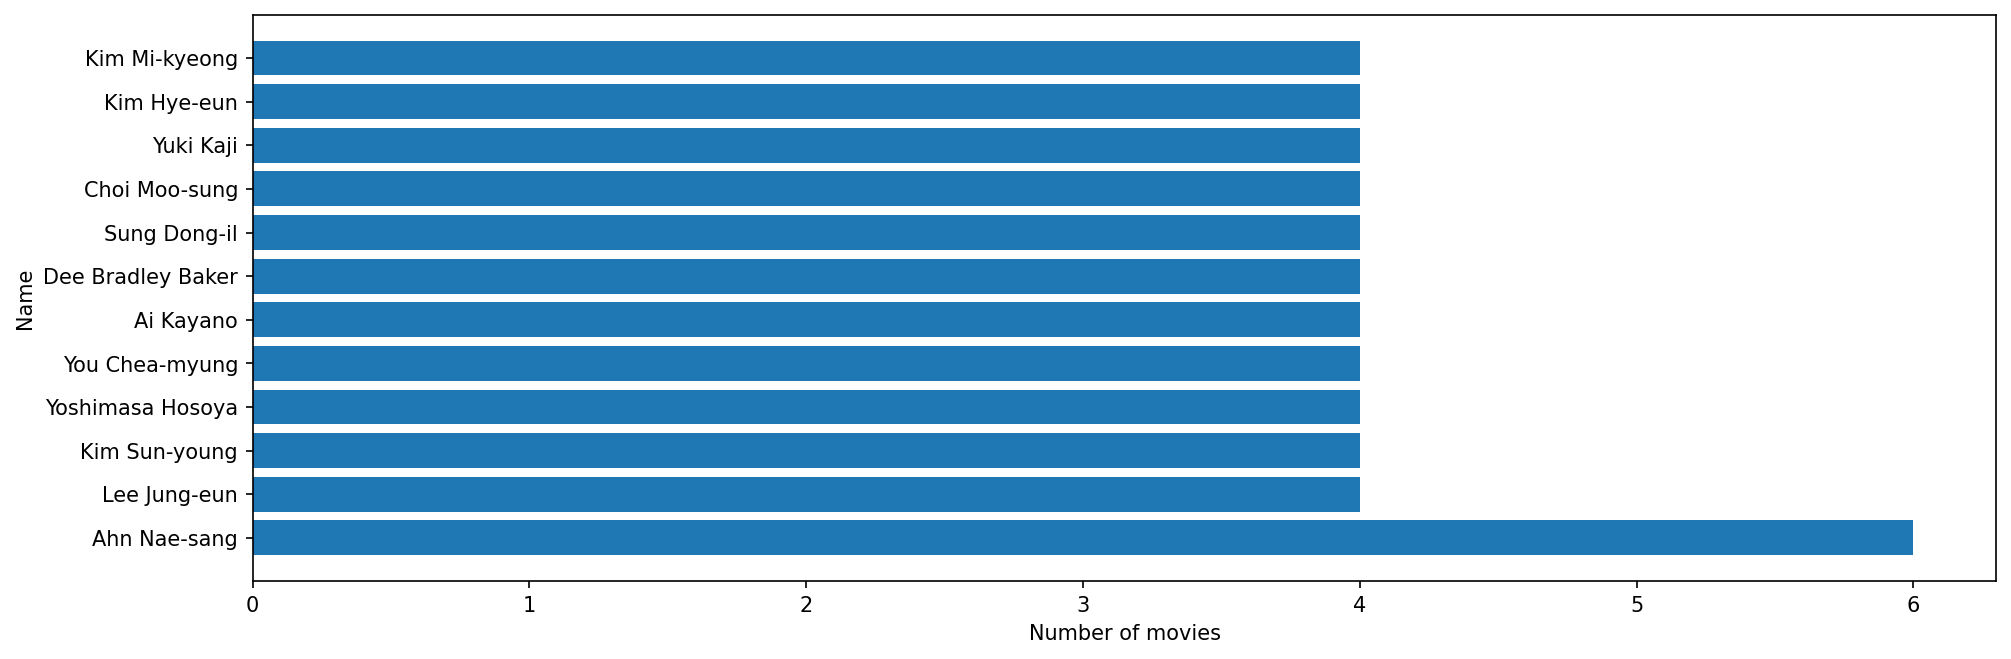

In [158]:
# graph people_s
people_top_s = people_s[people_s['count_people'] >= 4]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=people_top_s['name'],
          width=people_top_s['count_people'])
plt.xlabel("Number of movies")
plt.ylabel("Name") 

In [167]:
df_merge_show_8.loc[df_merge_show_8['name'] == 'Ahn Nae-sang']

,index_x,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,index_y,person_id,name,character,role
1583,2137,ts76486,Just Between Lovers,SHOW,2017,TV-14,73,"['drama', 'romance']",['KR'],1.0,tt7521898,8.2,1872.0,34946,103045,Ahn Nae-sang,Ha Dong-Chul,ACTOR
1634,2192,ts83360,The Guest,SHOW,2018,TV-MA,66,"['crime', 'thriller', 'drama', 'horror', 'come...",['KR'],1.0,tt8801670,8.1,1537.0,35715,103045,Ahn Nae-sang,Priest Yang,ACTOR
1731,2348,ts78353,Misty,SHOW,2018,TV-MA,71,"['crime', 'romance', 'thriller', 'drama']",['KR'],1.0,tt7890244,8.1,596.0,37658,103045,Ahn Nae-sang,Kang Ki-Joon,ACTOR
2345,3812,ts223895,"Hi Bye, Mama!",SHOW,2020,NaN,61,"['scifi', 'comedy', 'drama', 'fantasy']",['KR'],2.0,tt11804034,8.0,1561.0,56507,103045,Ahn Nae-sang,Dr. Jang,ACTOR
2401,3994,ts88352,Designated Survivor: 60 Days,SHOW,2019,NaN,74,"['war', 'thriller', 'drama']",['KR'],1.0,tt10340990,8.1,1201.0,58474,103045,Ahn Nae-sang,Kang Sang-goo,ACTOR
2787,5423,ts279953,Law School,SHOW,2021,NaN,60,"['crime', 'drama', 'thriller']",['KR'],1.0,tt13885336,8.1,2024.0,73674,103045,Ahn Nae-sang,Seo Byung-ju,ACTOR


In [159]:
df_merge_movie_8 = pd.merge(df_movie_8,df_credits,left_on='id',right_on='id')
df_merge_movie_8

,index_x,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,index_y,person_id,name,character,role
0,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,0,3748,Robert De Niro,Travis Bickle,ACTOR
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,1,14658,Jodie Foster,Iris Steensma,ACTOR
2,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,2,7064,Albert Brooks,Tom,ACTOR
3,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,3,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,4,48933,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,5668,tm1024062,Nayattu,MOVIE,2021,NaN,124,"['drama', 'thriller', 'crime']",['IN'],tt11604676,8.1,6780.0,76096,2188756,Hakeem Shajahan,Hakkim,ACTOR
2643,5668,tm1024062,Nayattu,MOVIE,2021,NaN,124,"['drama', 'thriller', 'crime']",['IN'],tt11604676,8.1,6780.0,76097,1907364,Manohariyamama,Praveen's Mother,ACTOR
2644,5668,tm1024062,Nayattu,MOVIE,2021,NaN,124,"['drama', 'thriller', 'crime']",['IN'],tt11604676,8.1,6780.0,76098,1092348,Sminu Sijo,Maniyan's Wife,ACTOR
2645,5668,tm1024062,Nayattu,MOVIE,2021,NaN,124,"['drama', 'thriller', 'crime']",['IN'],tt11604676,8.1,6780.0,76099,254584,Jaise Jose,Police Team Coach,ACTOR


In [160]:
people_m = df_merge_movie_8.groupby('name').size().sort_values(ascending=False).to_frame('count_people')
people_m = people_m.reset_index()
people_m.head(10)

,name,count_people
0,Aamir Khan,10
1,Terry Jones,6
2,Bo Burnham,6
3,Nassar,5
4,R. Madhavan,4
5,Rajat Kapoor,4
6,Tabu,4
7,Terry Gilliam,4
8,Eric Idle,3
9,Zakir Hussain,3


Text(0, 0.5, 'Name')

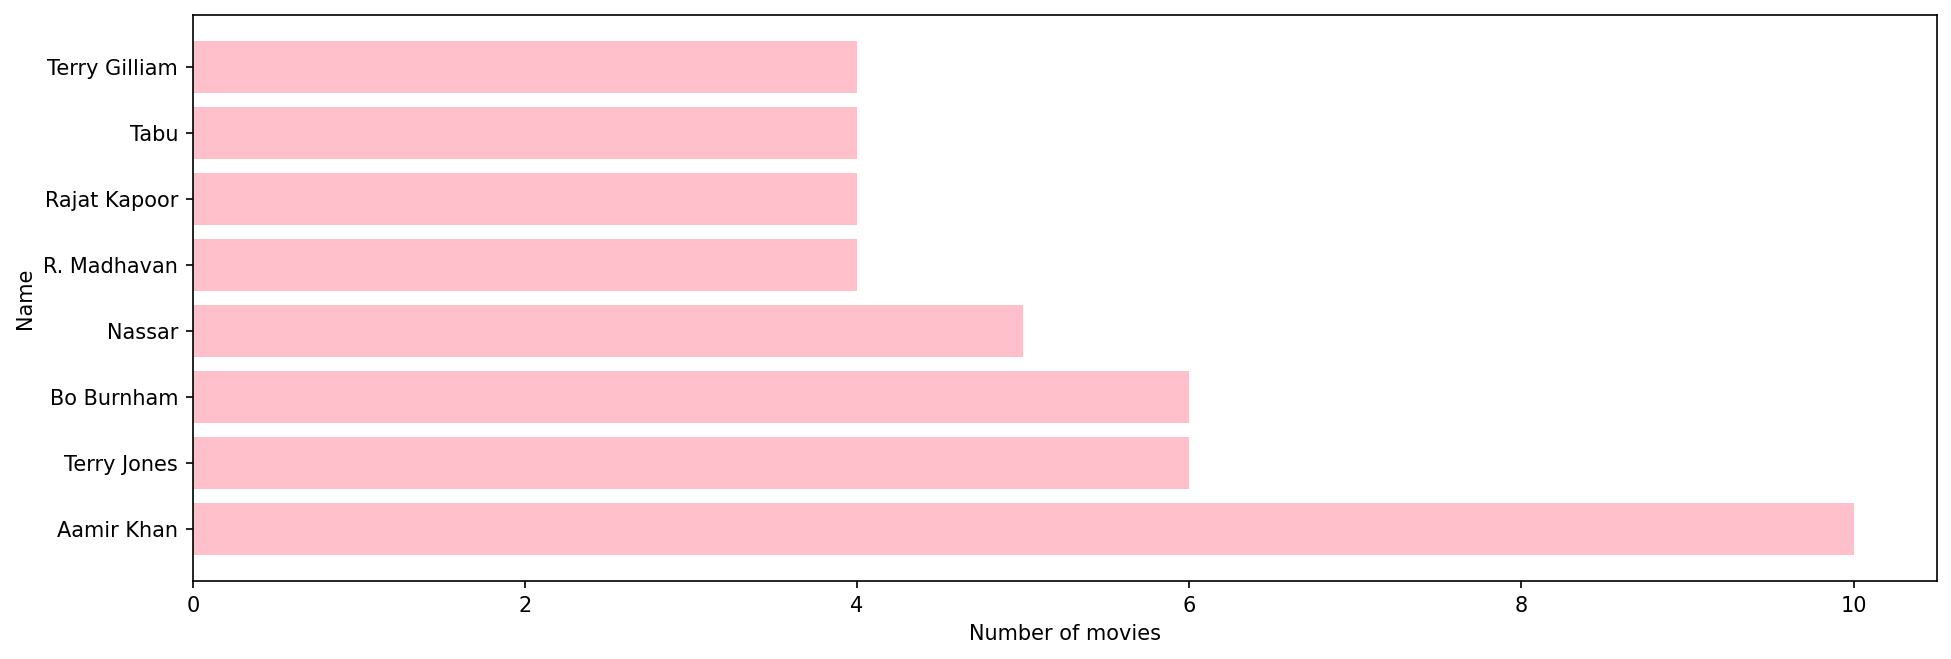

In [161]:
# graph people_m
people_top_m = people_m[people_m['count_people'] >= 4]
plt.figure(figsize=(15,5),dpi=150)
plt.barh( y=people_top_m['name'],
          width=people_top_m['count_people'],
          color = 'pink' )
plt.xlabel("Number of movies")
plt.ylabel("Name") 

In [162]:
df_merge_movie_8.loc[df_merge_movie_8['name'] == 'Aamir Khan']

,index_x,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,index_y,person_id,name,character,role
854,368,tm142564,3 Idiots,MOVIE,2009,PG-13,170,"['comedy', 'drama']",['IN'],tt1187043,8.4,385782.0,8866,61013,Aamir Khan,Rancho,ACTOR
878,397,tm43399,Lagaan: Once Upon a Time in India,MOVIE,2001,PG,224,"['drama', 'romance', 'sport']",['IN'],tt0169102,8.1,111053.0,9601,61013,Aamir Khan,Bhuvan,ACTOR
914,414,tm83786,Like Stars on Earth,MOVIE,2007,PG,165,"['drama', 'family']",['IN'],tt0986264,8.3,188234.0,9948,61013,Aamir Khan,Ram Shankar Nikumbh,ACTOR
926,414,tm83786,Like Stars on Earth,MOVIE,2007,PG,165,"['drama', 'family']",['IN'],tt0986264,8.3,188234.0,9960,61013,Aamir Khan,NaN,DIRECTOR
929,484,tm61056,Dil Chahta Hai,MOVIE,2001,G,183,"['drama', 'comedy', 'romance']",['IN'],tt0292490,8.1,71167.0,11112,61013,Aamir Khan,Akash,ACTOR
943,507,tm32885,Rang De Basanti,MOVIE,2006,PG-13,157,"['comedy', 'drama', 'history', 'crime']",['IN'],tt0460895,8.1,118092.0,11477,61013,Aamir Khan,Daljit 'DJ' Singh,ACTOR
1119,625,tm368679,Madness in the Desert,MOVIE,2004,NaN,141,['documentation'],['IN'],tt0417528,8.4,373.0,12914,61013,Aamir Khan,Himself,ACTOR
1646,1033,tm147913,PK,MOVIE,2014,PG-13,153,"['comedy', 'drama', 'romance', 'fantasy', 'sci...",['IN'],tt2338151,8.2,178012.0,19874,61013,Aamir Khan,PK,ACTOR
1862,1375,tm245671,Dangal,MOVIE,2016,PG,161,"['action', 'drama', 'sport']",['IN'],tt5074352,8.4,180247.0,24436,61013,Aamir Khan,Mahavir Singh Phogat,ACTOR
2440,4252,tm455981,Rubaru Roshni,MOVIE,2019,NaN,110,['documentation'],['IN'],tt9663460,8.7,584.0,61285,61013,Aamir Khan,Himself,ACTOR


<ipython-input-163-26aaa31cf553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show_8['release_year'] = pd.to_datetime(df_show_8['release_year'], format='%Y')


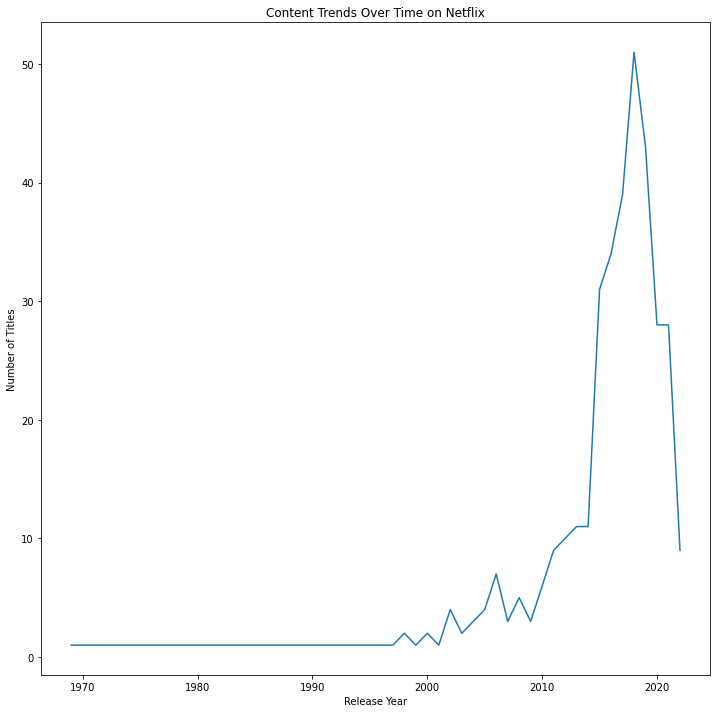

In [163]:

df_show_8['release_year'] = pd.to_datetime(df_show_8['release_year'], format='%Y')

# Group the data by release year and count the number of titles in each year
year_counts = df_show_8.groupby('release_year').size()

# Create a line plot of the title counts over time
plt.figure(figsize=(12,12))
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Content Trends Over Time on Netflix')
plt.show()

<ipython-input-168-f42bdfb034ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_8['release_year'] = pd.to_datetime(df_movie_8['release_year'], format='%Y')


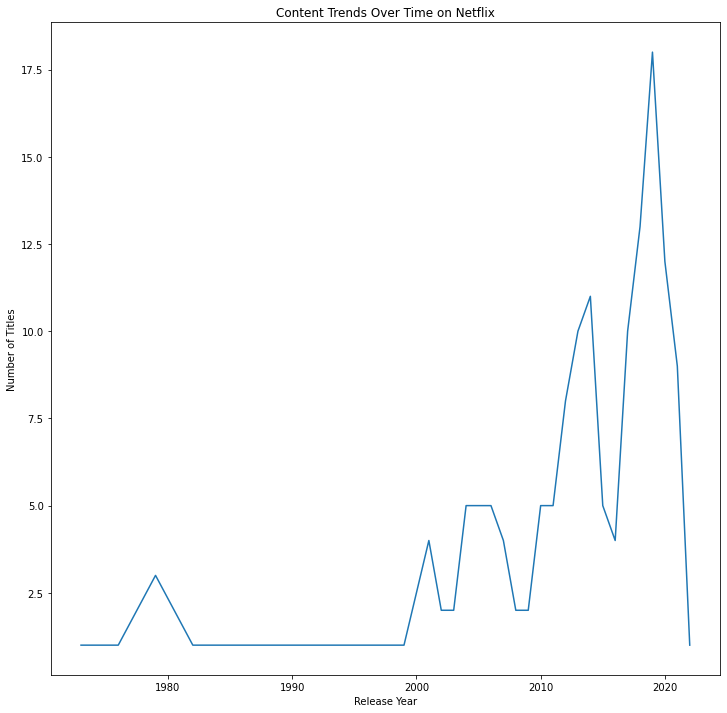

In [168]:

df_movie_8['release_year'] = pd.to_datetime(df_movie_8['release_year'], format='%Y')

# Group the data by release year and count the number of titles in each year
year_counts = df_movie_8.groupby('release_year').size()

# Create a line plot of the title counts over time
plt.figure(figsize=(12,12))
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Content Trends Over Time on Netflix')
plt.show()

In [164]:
df_show_8.groupby('release_year').size()

release_year
1969-01-01     1
1972-01-01     1
1989-01-01     1
1993-01-01     1
1995-01-01     1
1997-01-01     1
1998-01-01     2
1999-01-01     1
2000-01-01     2
2001-01-01     1
2002-01-01     4
2003-01-01     2
2005-01-01     4
2006-01-01     7
2007-01-01     3
2008-01-01     5
2009-01-01     3
2010-01-01     6
2011-01-01     9
2012-01-01    10
2013-01-01    11
2014-01-01    11
2015-01-01    31
2016-01-01    34
2017-01-01    39
2018-01-01    51
2019-01-01    43
2020-01-01    28
2021-01-01    28
2022-01-01     9
dtype: int64

<ipython-input-165-5709db59eafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show_8['release_year'] = pd.to_datetime(df_show_8['release_year'], format='%Y')
<ipython-input-165-5709db59eafa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_8['release_year'] = pd.to_datetime(df_movie_8['release_year'], format='%Y')


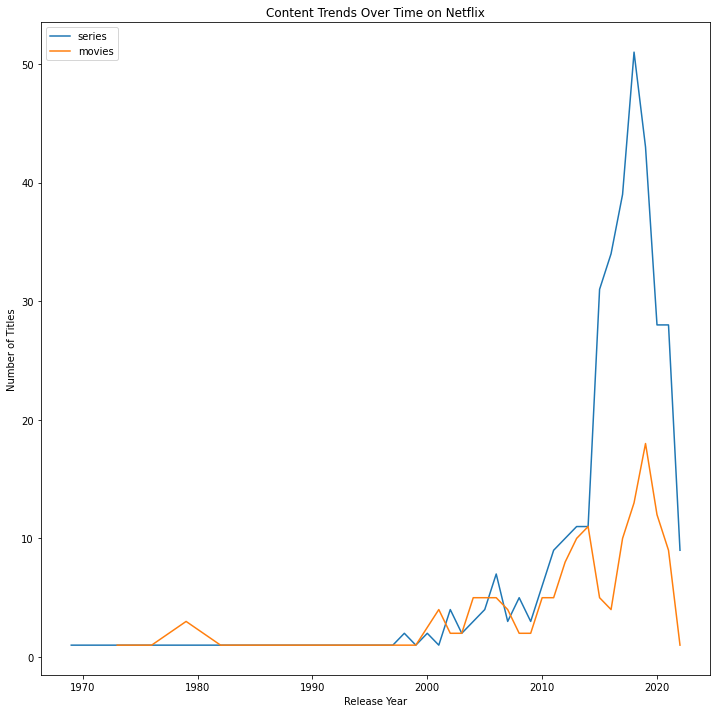

In [165]:

df_show_8['release_year'] = pd.to_datetime(df_show_8['release_year'], format='%Y')


year_counts = df_show_8.groupby('release_year').size()

df_movie_8['release_year'] = pd.to_datetime(df_movie_8['release_year'], format='%Y')

year_counts1 = df_movie_8.groupby('release_year').size()

# Create a line plot of the title counts over time
plt.figure(figsize=(12,12))
plt.plot(year_counts.index, year_counts.values, label='series')
plt.plot(year_counts1.index, year_counts1.values, label='movies')
plt.legend(loc='upper left')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Content Trends Over Time on Netflix')
plt.show()

<ipython-input-169-0a1080ac67fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['release_year'] = pd.to_datetime(df_show['release_year'], format='%Y')


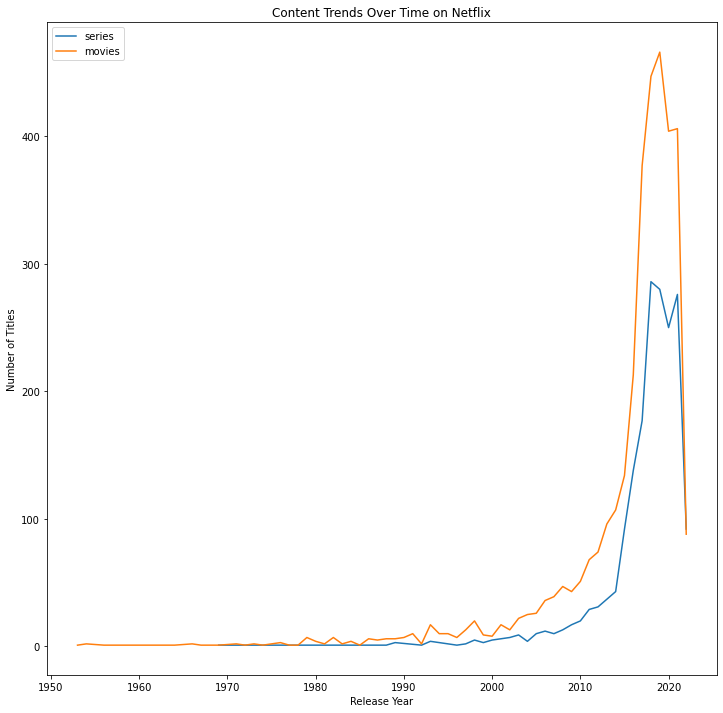

In [169]:
df_show['release_year'] = pd.to_datetime(df_show['release_year'], format='%Y')


year_counts = df_show.groupby('release_year').size()

df_movie['release_year'] = pd.to_datetime(df_movie['release_year'], format='%Y')

year_counts1 = df_movie.groupby('release_year').size()

# Create a line plot of the title counts over time
plt.figure(figsize=(12,12))
plt.plot(year_counts.index, year_counts.values, label='series')
plt.plot(year_counts1.index, year_counts1.values, label='movies')
plt.legend(loc='upper left')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Content Trends Over Time on Netflix')
plt.show()

In [166]:
df_movie_8.groupby('release_year').size()

release_year
1973-01-01     1
1975-01-01     1
1976-01-01     1
1979-01-01     3
1982-01-01     1
1984-01-01     1
1985-01-01     1
1986-01-01     1
1987-01-01     1
1989-01-01     1
1993-01-01     1
1994-01-01     1
1995-01-01     1
1997-01-01     1
1998-01-01     1
1999-01-01     1
2001-01-01     4
2002-01-01     2
2003-01-01     2
2004-01-01     5
2006-01-01     5
2007-01-01     4
2008-01-01     2
2009-01-01     2
2010-01-01     5
2011-01-01     5
2012-01-01     8
2013-01-01    10
2014-01-01    11
2015-01-01     5
2016-01-01     4
2017-01-01    10
2018-01-01    13
2019-01-01    18
2020-01-01    12
2021-01-01     9
2022-01-01     1
dtype: int64